<a href="https://colab.research.google.com/github/pankaj-beldar/Capstone_2_Appliance_Energy_Prediction/blob/main/Copstone_2__Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
Data-driven prediction of energy use of appliances
The data set is at **10 min** for about **4.5 months**. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).


# **Introduction**

The understanding of the appliances energy use in buildings has
been the subject of numerous research studies , since appliances represent a significant portion (between 20 and 30%  of
the electrical energy demand . For instance, in a study
in the UK for domestic buildings , appliances, such as televisions
and consumer electronics operating in standby were attributed to
a  near about 10% increase in the electricity consumption. Regression models
for energy use can help to understand the relationships between
different variables and to quantify their impact. Thus, prediction
models of electrical energy consumption in buildings can be useful for a number of applications: to determine adequate sizing of
photovoltaics and energy storage to diminish power flow into the
grid , to detect abnormal energy use patterns , to be part of
an energy management system for load control , to model
predictive control applications where the loads are needed ,
for demand side management (DSM) and demand side response
(DSR) and as an inputfor building performance simulation
analysis

# **Data Attributes**

1. **date:** time year-month-day hour:minute:second

2. **Appliances:** energy use in Wh (Dependent variable)

3. **lights:** energy use of light fixtures in the house in Wh (Drop this column)

4. **T1**, Temperature in kitchen area, in Celsius

5. **RH1**: Humidity in kitchen area, in % 
6. **T2,** Temperature: in living room area, in Celsius 

7. **RH2**:Humidity in living room area, in %

8. **T3:** Temperature in laundry room area

9. **RH3:** Humidity in laundry room area, in % 

10. **T4:** Temperature in office room, in Celsius 

11. **RH4:**Humidity in office room, in %

12. **T5:** Temperature in bathroom, in Celsius

13. **RH5:** Humidity in bathroom, in % 
14. **T6**, Temperature outside the building (north side), in Celsius

15. **RH6:** Humidity outside the building (north side), in %

16. **T7:** Temperature in ironing room , in Celsius

17. **RH7:** Humidity in ironing room, in % 
18. **T8**, Temperature in teenager room 2, in Celsius 

19. **RH8**: Humidity in teenager room 2, in %

20. **T9:** Temperature in parents room, in Celsius

21. **RH9:** Humidity in parents room, in % 
22. **To**, Temperature outside (from Chievres weather station), inCelsius 
23. **Pressure** (from Chievres weather station), in mm Hg 
24. **RHout**, Humidity outside (from
Chievres weather station), in %

25. **Wind speed:** (from Chievres weather station), in m/s

26. **Visibility:** (from Chievres weather station), in km

27. **Tdewpoint:** (from Chievres weather station), Â°C

28. **rv1:** Random variable 1, nondimensional

29. **rv2:** Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

# **Importing Given Dataset and Requied libraries**

In [396]:
#importing different libraries required for regression analysis
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [397]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [398]:
# read dataset from pandas library and convert 'date' column to DateTime format
df = pd.read_csv('/content/data_application_energy.csv', parse_dates=['date'])


# **Lets, Have a look on Data!**

In [399]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [400]:
df.shape

(19735, 29)

Data have 19735 readings and 29 Attiributes

In [401]:
#now Dropping Lights column as per instruction in Problem Statement
df.drop('lights', axis =1, inplace = True)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

In [403]:
df.isnull().sum()

date           0
Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

by looking at data info , It is observed that all the features are of a numerical  (float -datatype) except date column and no null values are present in the given data.

In [404]:
df.describe()

Appliances            T1          RH_1            T2          RH_2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958     21.686571     40.259739     20.341219     40.420420   
std      102.524891      1.606066      3.979299      2.192974      4.069813   
min       10.000000     16.790000     27.023333     16.100000     20.463333   
25%       50.000000     20.760000     37.333333     18.790000     37.900000   
50%       60.000000     21.600000     39.656667     20.000000     40.500000   
75%      100.000000     22.600000     43.066667     21.500000     43.260000   
max     1080.000000     26.260000     63.360000     29.856667     56.026667   

                 T3          RH_3            T4          RH_4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      22.267611     39.242500     20.855335     39.026904     19.592106   
std        2.006111      3.254576      2.042884      4.341321      1.844623   
min       17.200000     28.766667     15.100000     27.660000     15.330000   
25%       20.790000     36.900000     19.530000     35.530000     18.277500   
50%       22.100000     38.530000     20.666667     38.400000     19.390000   
75%       23.290000     41.760000     22.100000     42.156667     20.619643   
max       29.236000     50.163333     26.200000     51.090000     25.795000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 27 columns]

In [405]:
#check name of columns 
df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Lets check duplicate rows

In [406]:
df.duplicated().any()

False

Lets utilise the 'date' colomn to extract **time of day, day of month, day of week, month, month name, day name** to find out more insights from time series data.

In [407]:
df['date'] = pd.to_datetime(df['date']) # convert into DateTime format
df['time_of_day'] = df['date'].dt.hour 
df['day_of_month'] = df['date'].dt.day 
df['day_of_week'] = df['date'].dt.dayofweek
df['month']=df['date'].dt.month
df['month_name']=df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()

In [408]:
df.head()

date  Appliances     T1       RH_1    T2       RH_2     T3  \
0 2016-01-11 17:00:00          60  19.89  47.596667  19.2  44.790000  19.79   
1 2016-01-11 17:10:00          60  19.89  46.693333  19.2  44.722500  19.79   
2 2016-01-11 17:20:00          50  19.89  46.300000  19.2  44.626667  19.79   
3 2016-01-11 17:30:00          50  19.89  46.066667  19.2  44.590000  19.79   
4 2016-01-11 17:40:00          60  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4  ...  Visibility  Tdewpoint        rv1  \
0  44.730000  19.000000  45.566667  ...   63.000000        5.3  13.275433   
1  44.790000  19.000000  45.992500  ...   59.166667        5.2  18.606195   
2  44.933333  18.926667  45.890000  ...   55.333333        5.1  28.642668   
3  45.000000  18.890000  45.723333  ...   51.500000        5.0  45.410389   
4  45.000000  18.890000  45.530000  ...   47.666667        4.9  10.084097   

         rv2  time_of_day  day_of_month  day_of_week  month  month_name  \
0  13.275433           17            11            0      1     January   
1  18.606195           17            11            0      1     January   
2  28.642668           17            11            0      1     January   
3  45.410389           17            11            0      1     January   
4  10.084097           17            11            0      1     January   

   day_name  
0    Monday  
1    Monday  
2    Monday  
3    Monday  
4    Monday  

[5 rows x 34 columns]

Lets create Categorical feature based on time as the phase of the day as Evening, Night, Morning, Afternoon

In [409]:
def phase_day(row):
  if 18 <= int(row['time_of_day'])<24:
    return 'Evening'
  if 6 > int(row['time_of_day']):
    return 'Night'
  if 6 <= int(row['time_of_day']) <12:
    return 'Morning'
  if 12 <= int(row['time_of_day'])< 18:
    return 'AfterNoon'


In [410]:
df['Phase_of_Day'] = df.apply(lambda row: phase_day(row), axis =1)

In [411]:
#Drop date column as we dont need it as far as time series analysis is concerned
df.drop('date', axis =1, inplace = True)

In [412]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'time_of_day', 'day_of_month', 'day_of_week',
       'month', 'month_name', 'day_name', 'Phase_of_Day'],
      dtype='object')

In [413]:
#Identify the Types of Features eg. numerical_features, dependent_feature, categorical_feature
numerical_features = [ 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'time_of_day', 'day_of_month']
dependent_feature = ['Appliances']
categorical_feature = [ 'Phase_of_Day','day_name','month_name']

In [414]:
df.head()

Appliances     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0          60  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1          60  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2          50  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3          50  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000   
4          60  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   

        RH_4         T5  ...  Tdewpoint        rv1        rv2  time_of_day  \
0  45.566667  17.166667  ...        5.3  13.275433  13.275433           17   
1  45.992500  17.166667  ...        5.2  18.606195  18.606195           17   
2  45.890000  17.166667  ...        5.1  28.642668  28.642668           17   
3  45.723333  17.166667  ...        5.0  45.410389  45.410389           17   
4  45.530000  17.200000  ...        4.9  10.084097  10.084097           17   

   day_of_month  day_of_week  month  month_name  day_name  Phase_of_Day  
0            11            0      1     January    Monday     AfterNoon  
1            11            0      1     January    Monday     AfterNoon  
2            11            0      1     January    Monday     AfterNoon  
3            11            0      1     January    Monday     AfterNoon  
4            11            0      1     January    Monday     AfterNoon  

[5 rows x 34 columns]

In [415]:
df.describe()

Appliances            T1          RH_1            T2          RH_2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958     21.686571     40.259739     20.341219     40.420420   
std      102.524891      1.606066      3.979299      2.192974      4.069813   
min       10.000000     16.790000     27.023333     16.100000     20.463333   
25%       50.000000     20.760000     37.333333     18.790000     37.900000   
50%       60.000000     21.600000     39.656667     20.000000     40.500000   
75%      100.000000     22.600000     43.066667     21.500000     43.260000   
max     1080.000000     26.260000     63.360000     29.856667     56.026667   

                 T3          RH_3            T4          RH_4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      22.267611     39.242500     20.855335     39.026904     19.592106   
std        2.006111      3.254576      2.042884      4.341321      1.844623   
min       17.200000     28.766667     15.100000     27.660000     15.330000   
25%       20.790000     36.900000     19.530000     35.530000     18.277500   
50%       22.100000     38.530000     20.666667     38.400000     19.390000   
75%       23.290000     41.760000     22.100000     42.156667     20.619643   
max       29.236000     50.163333     26.200000     51.090000     25.795000   

       ...        RH_out     Windspeed    Visibility     Tdewpoint  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     79.750418      4.039752     38.330834      3.760707   
std    ...     14.901088      2.451221     11.794719      4.194648   
min    ...     24.000000      0.000000      1.000000     -6.600000   
25%    ...     70.333333      2.000000     29.000000      0.900000   
50%    ...     83.666667      3.666667     40.000000      3.433333   
75%    ...     91.666667      5.500000     40.000000      6.566667   
max    ...    100.000000     14.000000     66.000000     15.500000   

                rv1           rv2   time_of_day  day_of_month   day_of_week  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      24.988033     24.988033     11.502002     16.057411      2.977249   
std       14.496634     14.496634      6.921953      8.450998      1.985617   
min        0.005322      0.005322      0.000000      1.000000      0.000000   
25%       12.497889     12.497889      6.000000      9.000000      1.000000   
50%       24.897653     24.897653     12.000000     16.000000      3.000000   
75%       37.583769     37.583769     17.000000     23.000000      5.000000   
max       49.996530     49.996530     23.000000     31.000000      6.000000   

              month  
count  19735.000000  
mean       3.101647  
std        1.339200  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  

[8 rows x 31 columns]

#**Exploratory** **Data** **Analysis** **[EDA]**



##Univariate Analysis

###Numerical Features

In [416]:
df.describe().columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'time_of_day', 'day_of_month', 'day_of_week',
       'month'],
      dtype='object')

 #### Distribution 

In [417]:
len(numerical_features)

28

Lets plot the distribution plot of each variable with distribution plot to check wheather all variables are normally distributed or not. 

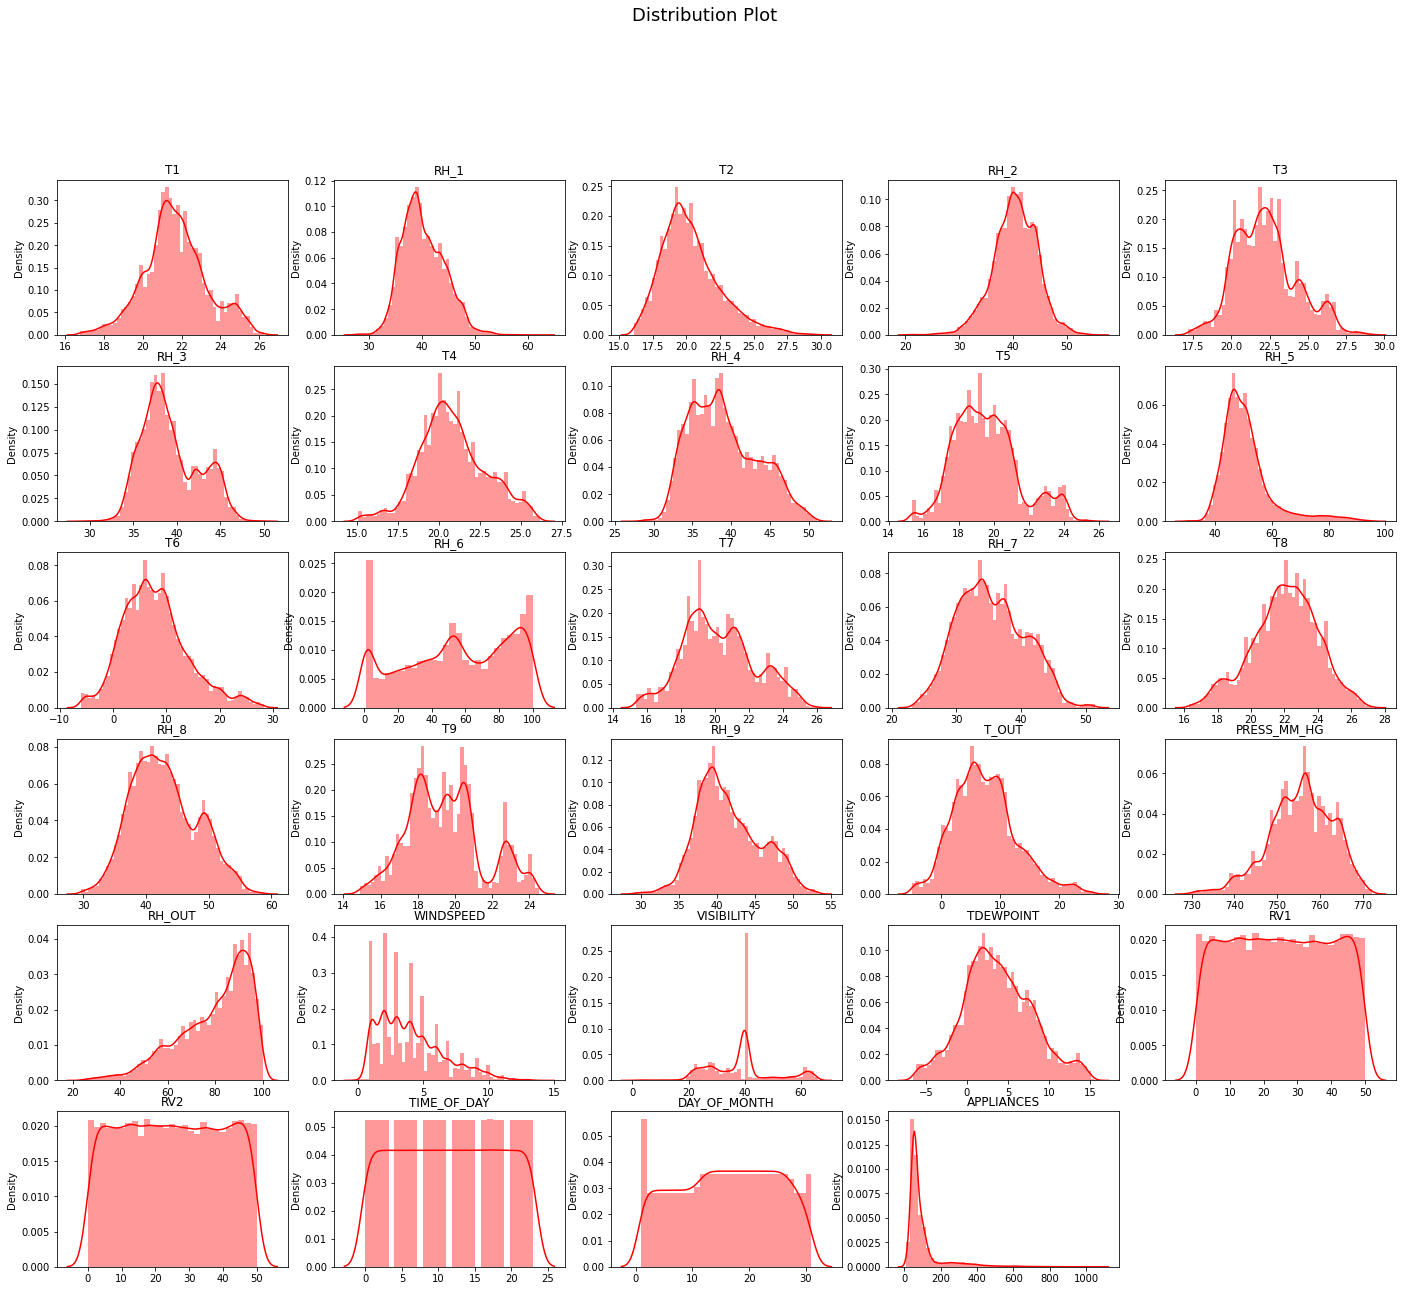

In [418]:
plt.figure(figsize=(24, 20))
plt.suptitle("Distribution Plot", fontsize=18, y=1)

for n, ticker in enumerate(numerical_features + ['Appliances']):
    ax = plt.subplot(6, 5, n + 1)
    sns.distplot(df[ticker], color='r')
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

Temperature and
Humidity attributes have
a gaussian-like
distribution. The target variable
‘Appliances’ has a
skewed gaussian
distribution indicating a
wide range of outliers
over the 3rd quartile. From above distribution plot we can conclude that variables time_of_day, rv2, day_of_month, appliances, rh6, rv1, T9, T3, windspeed, visibility are not normally distributed. other variables are seems to be normally distributed.

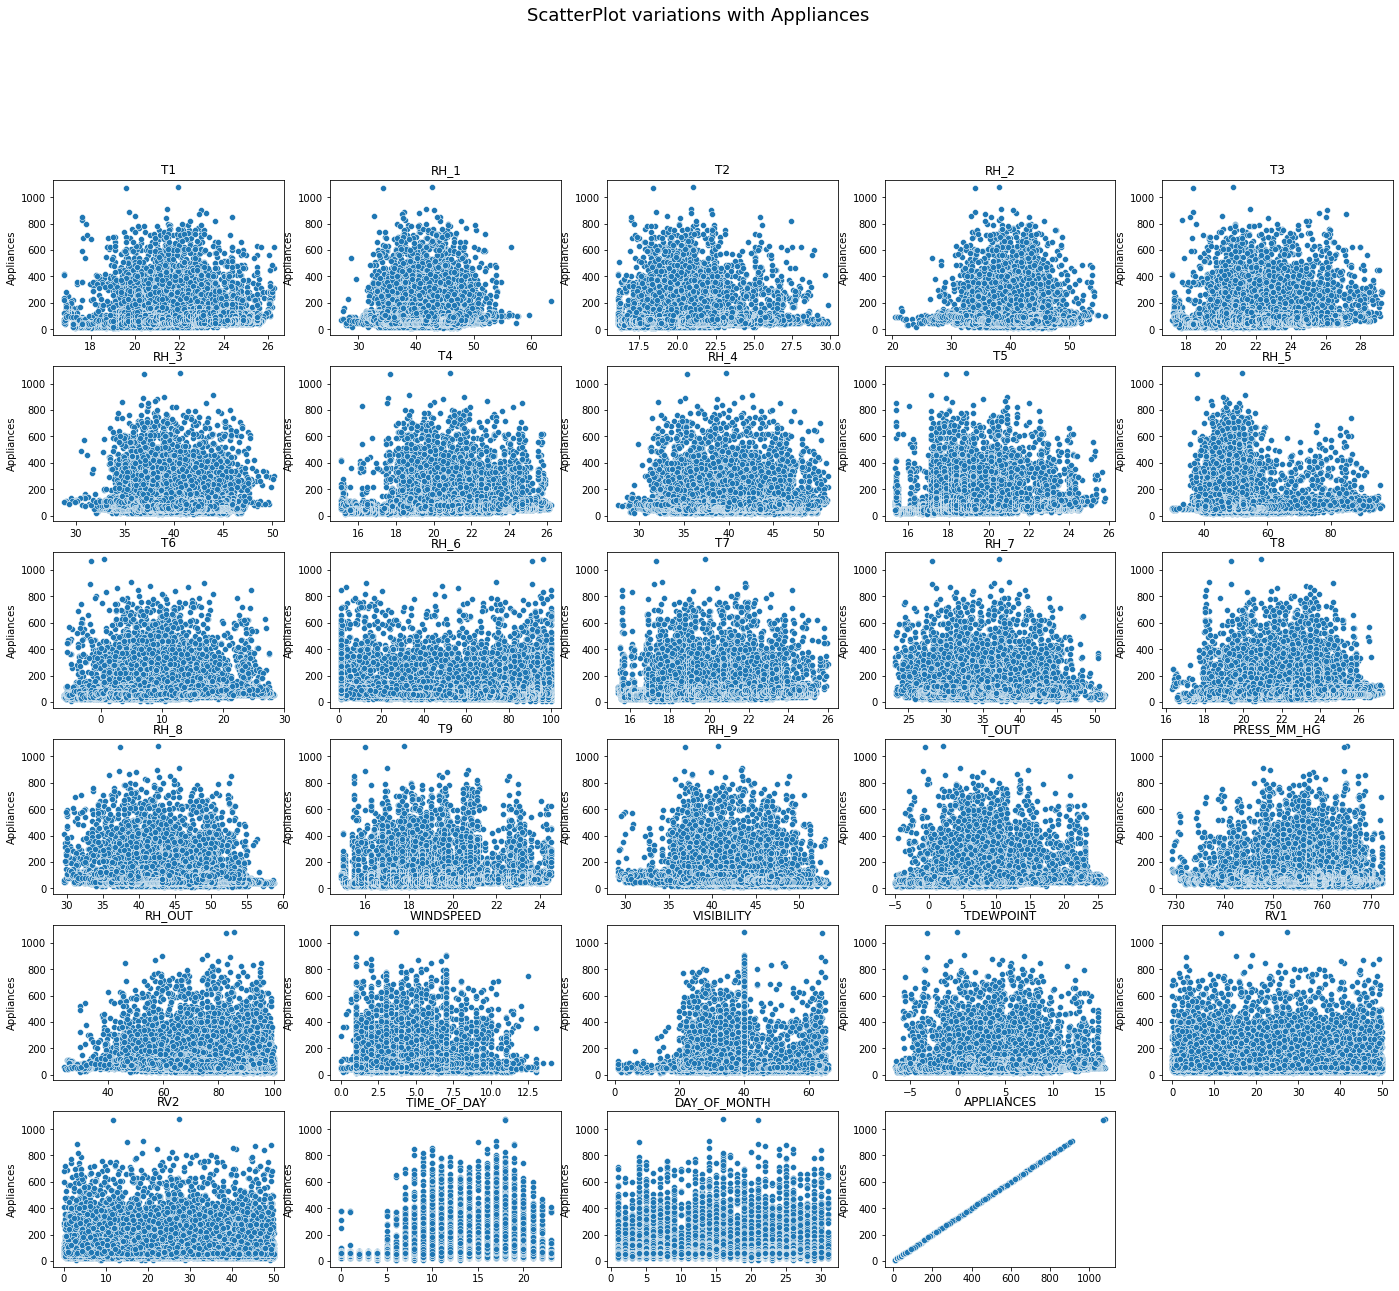

In [419]:
plt.figure(figsize=(24, 20))
plt.suptitle("ScatterPlot variations with Appliances ", fontsize=18, y=1)

for n, ticker in enumerate(numerical_features + ['Appliances']):
    ax = plt.subplot(6, 5, n + 1)
    sns.scatterplot(df[ticker], x='ticker', y=df['Appliances'])
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

as Appliances is our dependent variable hence to find out the pattern of correlation with dependent variable , we have plotted the scatter plot of each variable with dependent variable. 
1. Energy consumption in kitchen area is less as compared to living room area.
2. Energy consumption bathroom, laundry area is more.
3. maximum Energy consumtion is from 12pm to 6pm time period.

#### Q-Q plot

When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile plot or qqplot. This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations.

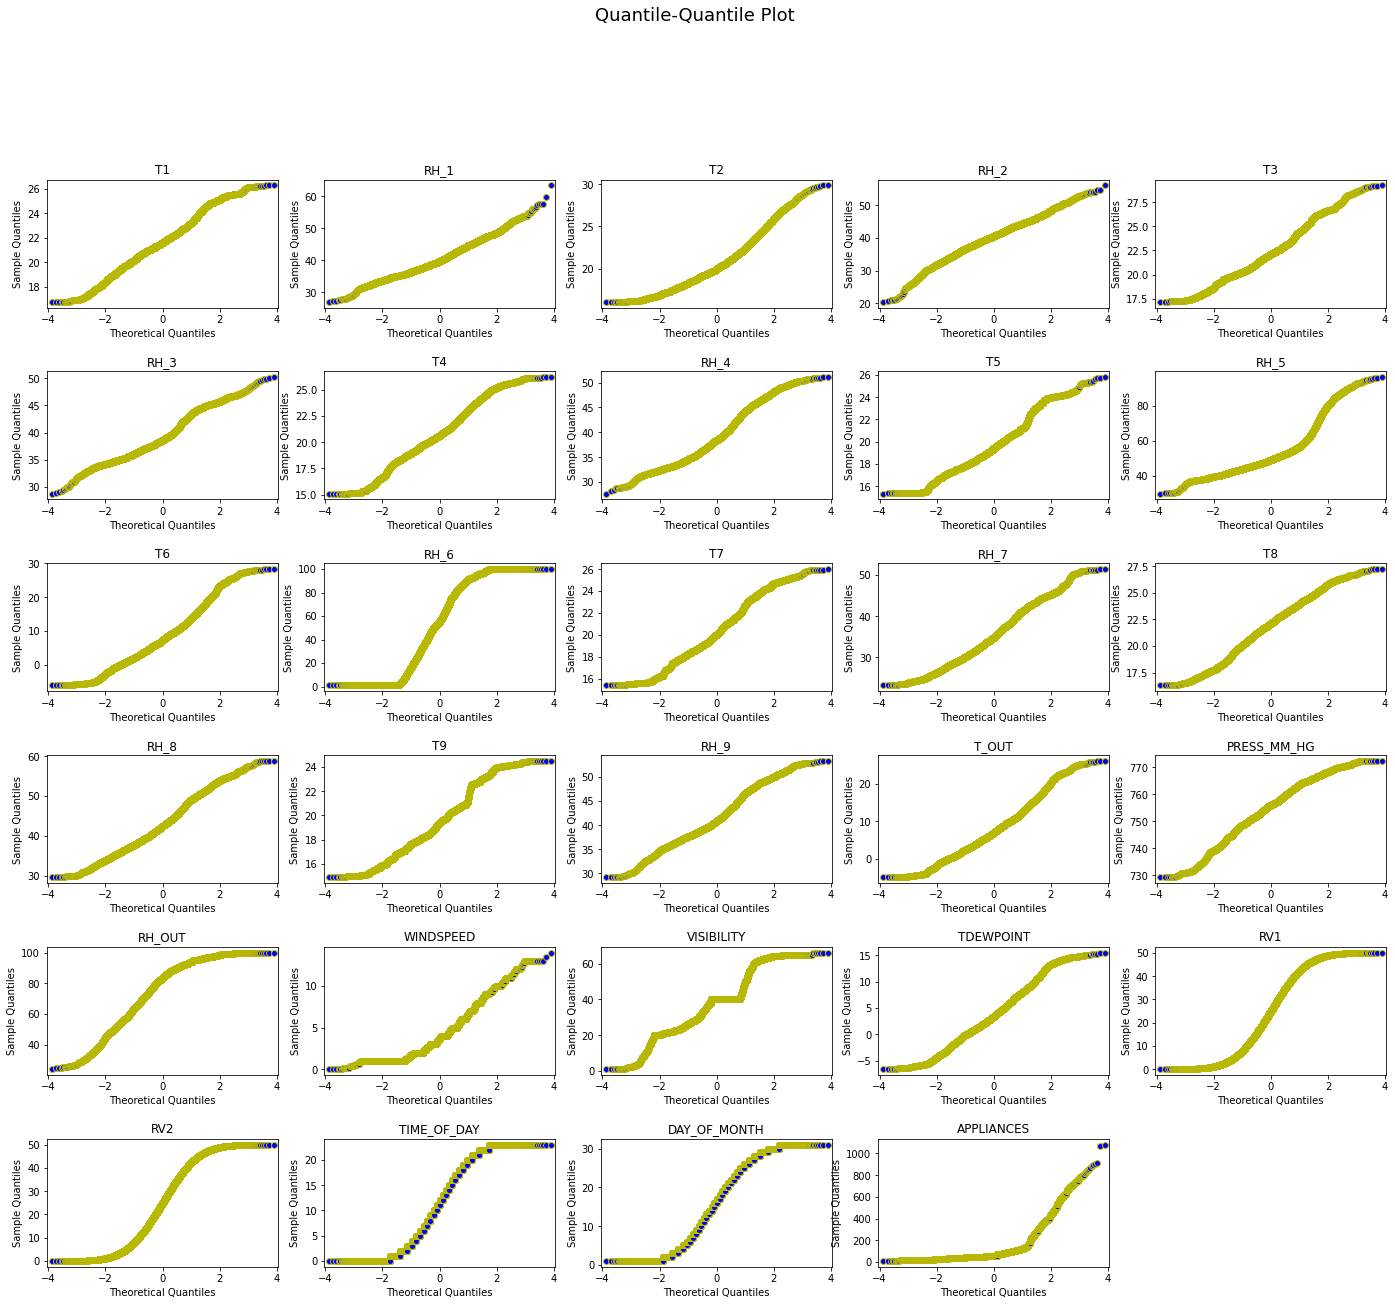

In [420]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

plt.figure(figsize=(24, 20))
plt.suptitle("Quantile-Quantile Plot", fontsize=18, y=1)

for n, ticker in enumerate(numerical_features+ ['Appliances']):
    ax = plt.subplot(6, 5, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    sm.qqplot(df[ticker] ,color='y', ax = ax)
    ax.set_title(ticker.upper())

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

There is large variaction in  QQ plot of variables time_of_day, rv2, day_of_month, appliances, rh6, rv1, T9, T3, windspeed, visibility

####Box Plot

#Lets plot BOXPLOT to visualize the outliers in each variables

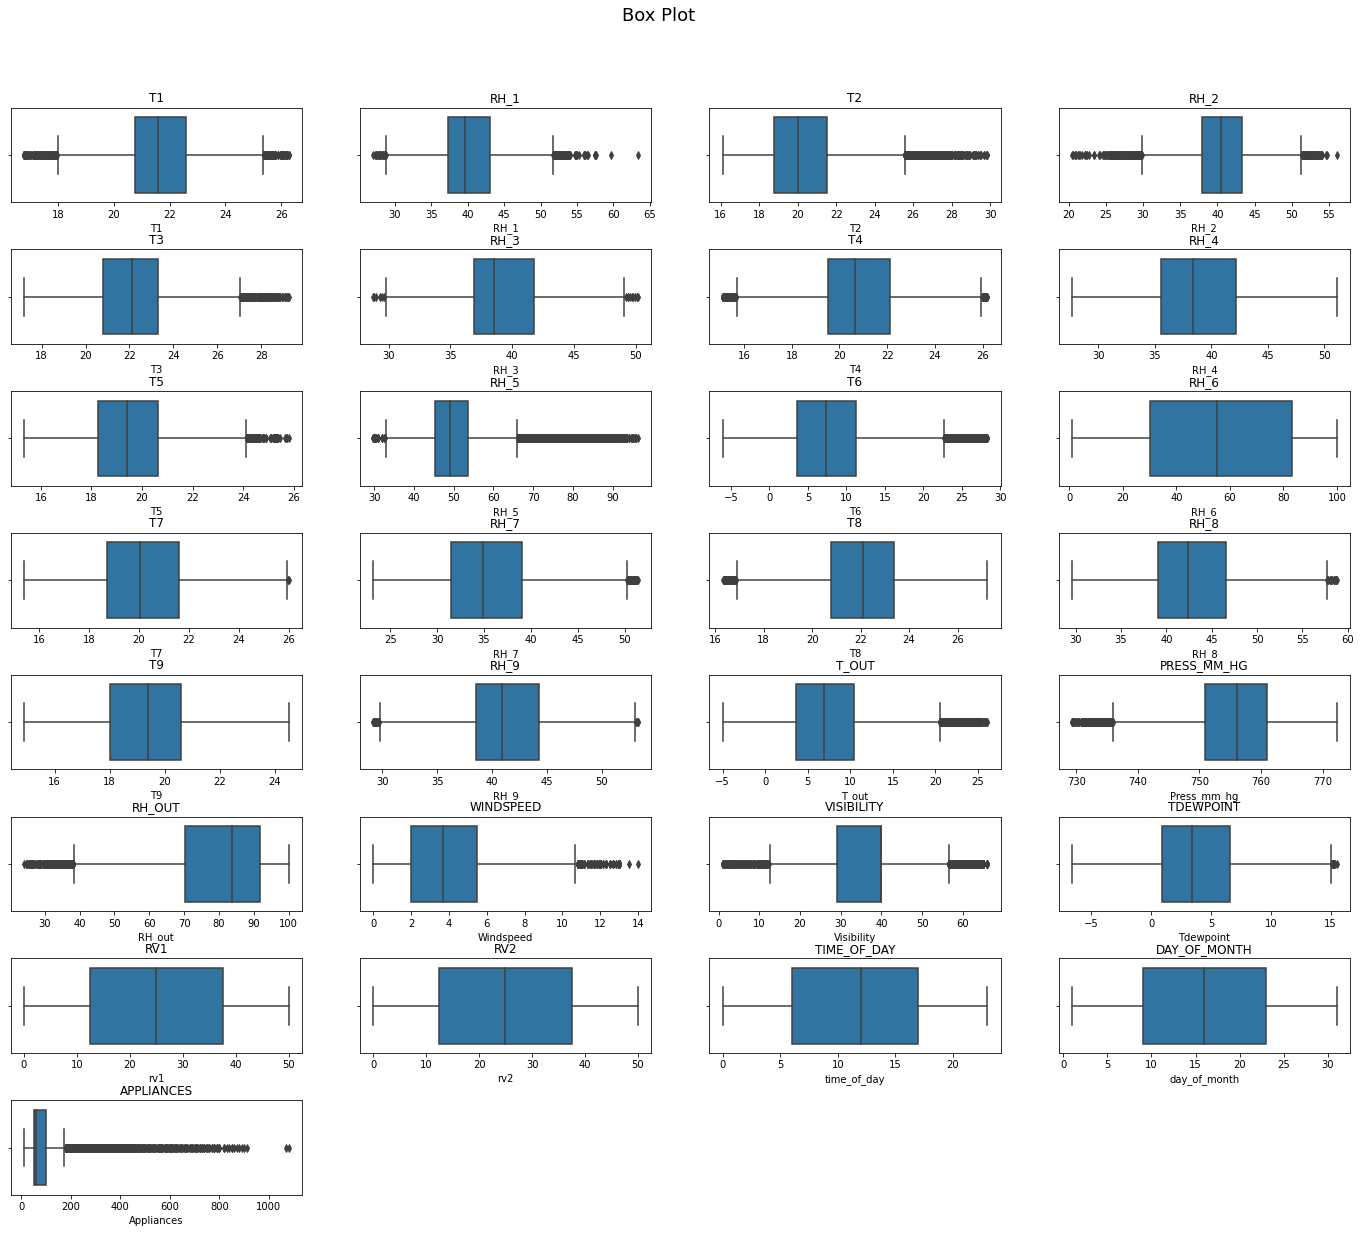

In [421]:

plt.figure(figsize=(24, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_features+ ['Appliances']):
    
    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    
    sns.boxplot(df[ticker],ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

Most of the appliances consume energy in between 0-200 Wh. We can clearly see that many variables consists of outliers. T1, T2, T3,T4,
T5,T6,T7,T8 and T_OUT
have outliers. RH_1,RH_2,RH_3,RH_5,
RH_7,RH_8,RH_9 and
RH_OUT have outliers
 Windspeed, Tdewpoint,
Visibility and the target
variable Appliances also
have outliers


Text(0.5, 1.0, 'Hourly Day Consumption')

<Figure size 720x360 with 0 Axes>

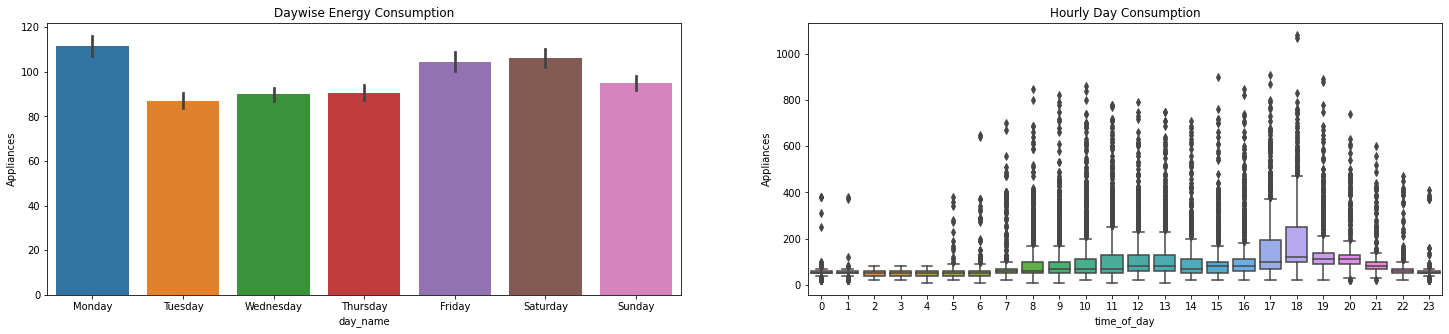

In [422]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
ax = axes.flatten()
sns.barplot(data=df, x='day_name', y='Appliances', ax=ax[0])
sns.boxplot(data=df, x='time_of_day', y='Appliances', ax=ax[1])
ax[0].set_title('Daywise Energy Consumption')
ax[1].set_title('Hourly Day Consumption')

1. Energy consumption on Monday is high, followed by saturday, friday and sunday.
2. Energy consumption from 6am to 11 pm is high. whereas is less in between 12 am to 6am. 

In [423]:
df.corr()

Appliances        T1      RH_1        T2      RH_2        T3  \
Appliances      1.000000  0.055447  0.086031  0.120073 -0.060465  0.085060   
T1              0.055447  1.000000  0.164006  0.836834 -0.002509  0.892402   
RH_1            0.086031  0.164006  1.000000  0.269839  0.797535  0.253230   
T2              0.120073  0.836834  0.269839  1.000000 -0.165610  0.735245   
RH_2           -0.060465 -0.002509  0.797535 -0.165610  1.000000  0.137319   
T3              0.085060  0.892402  0.253230  0.735245  0.137319  1.000000   
RH_3            0.036292 -0.028550  0.844677  0.121497  0.678326 -0.011234   
T4              0.040281  0.877001  0.106180  0.762066 -0.047304  0.852778   
RH_4            0.016965  0.097861  0.880359  0.231563  0.721435  0.122737   
T5              0.019760  0.885247  0.205797  0.720550  0.110409  0.888169   
RH_5            0.006955 -0.014782  0.303258  0.029595  0.250271 -0.066355   
T6              0.117638  0.654769  0.316141  0.801186 -0.009670  0.686882   
RH_6           -0.083178 -0.615045  0.245126 -0.580372  0.389933 -0.647672   
T7              0.025801  0.838705  0.021397  0.663660 -0.051422  0.847374   
RH_7           -0.055642  0.135182  0.801122  0.229212  0.690584  0.172624   
T8              0.039572  0.825413 -0.030053  0.578191 -0.041023  0.795283   
RH_8           -0.094039 -0.006441  0.736196  0.068534  0.679777  0.044427   
T9              0.010010  0.844777  0.115263  0.675535  0.054544  0.901324   
RH_9           -0.051462  0.071756  0.764001  0.157346  0.676467  0.134602   
T_out           0.099155  0.682846  0.340767  0.792255  0.033674  0.699417   
Press_mm_hg    -0.034885 -0.150574 -0.293957 -0.133028 -0.255646 -0.189974   
RH_out         -0.152282 -0.345481  0.274126 -0.505291  0.584911 -0.281718   
Windspeed       0.087122 -0.087654  0.204932  0.052495  0.069190 -0.100776   
Visibility      0.000230 -0.076210 -0.021057 -0.069721 -0.005368 -0.102310   
Tdewpoint       0.015353  0.571309  0.639106  0.582602  0.499152  0.645886   
rv1            -0.011145 -0.006203 -0.000699 -0.011087  0.006275 -0.005194   
rv2            -0.011145 -0.006203 -0.000699 -0.011087  0.006275 -0.005194   
time_of_day     0.216792  0.178858  0.018594  0.254784 -0.183322  0.037624   
day_of_month    0.002366 -0.127088 -0.041397 -0.156913  0.037117 -0.077190   
day_of_week     0.003060  0.001381 -0.053782  0.000602 -0.044249 -0.017514   
month          -0.011606  0.706305 -0.094048  0.533479 -0.097914  0.790365   

                  RH_3        T4      RH_4        T5  ...    RH_out  \
Appliances    0.036292  0.040281  0.016965  0.019760  ... -0.152282   
T1           -0.028550  0.877001  0.097861  0.885247  ... -0.345481   
RH_1          0.844677  0.106180  0.880359  0.205797  ...  0.274126   
T2            0.121497  0.762066  0.231563  0.720550  ... -0.505291   
RH_2          0.678326 -0.047304  0.721435  0.110409  ...  0.584911   
T3           -0.011234  0.852778  0.122737  0.888169  ... -0.281718   
RH_3          1.000000 -0.140457  0.898978 -0.050062  ...  0.356192   
T4           -0.140457  1.000000 -0.048650  0.871813  ... -0.388602   
RH_4          0.898978 -0.048650  1.000000  0.091812  ...  0.336813   
T5           -0.050062  0.871813  0.091812  1.000000  ... -0.273953   
RH_5          0.375422 -0.076489  0.352591  0.032786  ...  0.185941   
T6            0.076833  0.652350  0.259047  0.629161  ... -0.569119   
RH_6          0.514912 -0.703149  0.392178 -0.632384  ...  0.718587   
T7           -0.250090  0.877763 -0.131204  0.870624  ... -0.411213   
RH_7          0.832685  0.043527  0.894301  0.148905  ...  0.378519   
T8           -0.283228  0.796256 -0.167066  0.824981  ... -0.300438   
RH_8          0.828822 -0.095192  0.847259  0.016388  ...  0.487355   
T9           -0.195270  0.889439 -0.044518  0.911055  ... -0.318848   
RH_9          0.833538 -0.025549  0.856591  0.072308  ...  0.359377   
T_out         0.118207  0.663478  0.293289  0.651321  ... -0.574197   
Press_mm_hg  -0.233274 -0.

###Categorical Features

Text(0.5, 1.0, 'Daywise Consumption')

<Figure size 720x360 with 0 Axes>

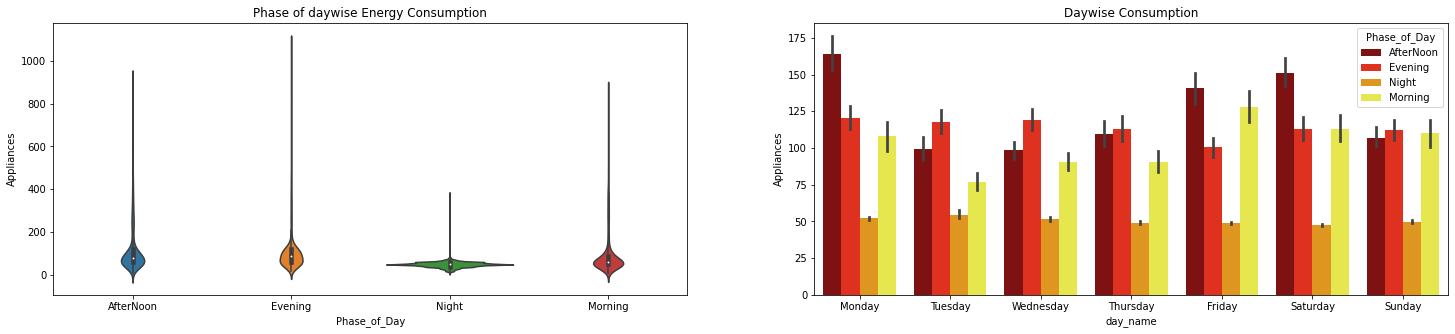

In [424]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
ax = axes.flatten()
sns.violinplot(x='Phase_of_Day', y='Appliances', data =df, ax=ax[0])
sns.barplot(data=df, x='day_name', y='Appliances',hue='Phase_of_Day',palette='hot' ,ax=ax[1])
ax[0].set_title('Phase of daywise Energy Consumption')
ax[1].set_title('Daywise Consumption')

1. Energy consumption at night is less as compared to morning and afternoon.
2. Energy consumption is high in the evening. whereas its high on monday, friday and saturday in the afternoon.
3. Most of the appliances consumes around 200 Wh energy.

##Bivariate Analysis

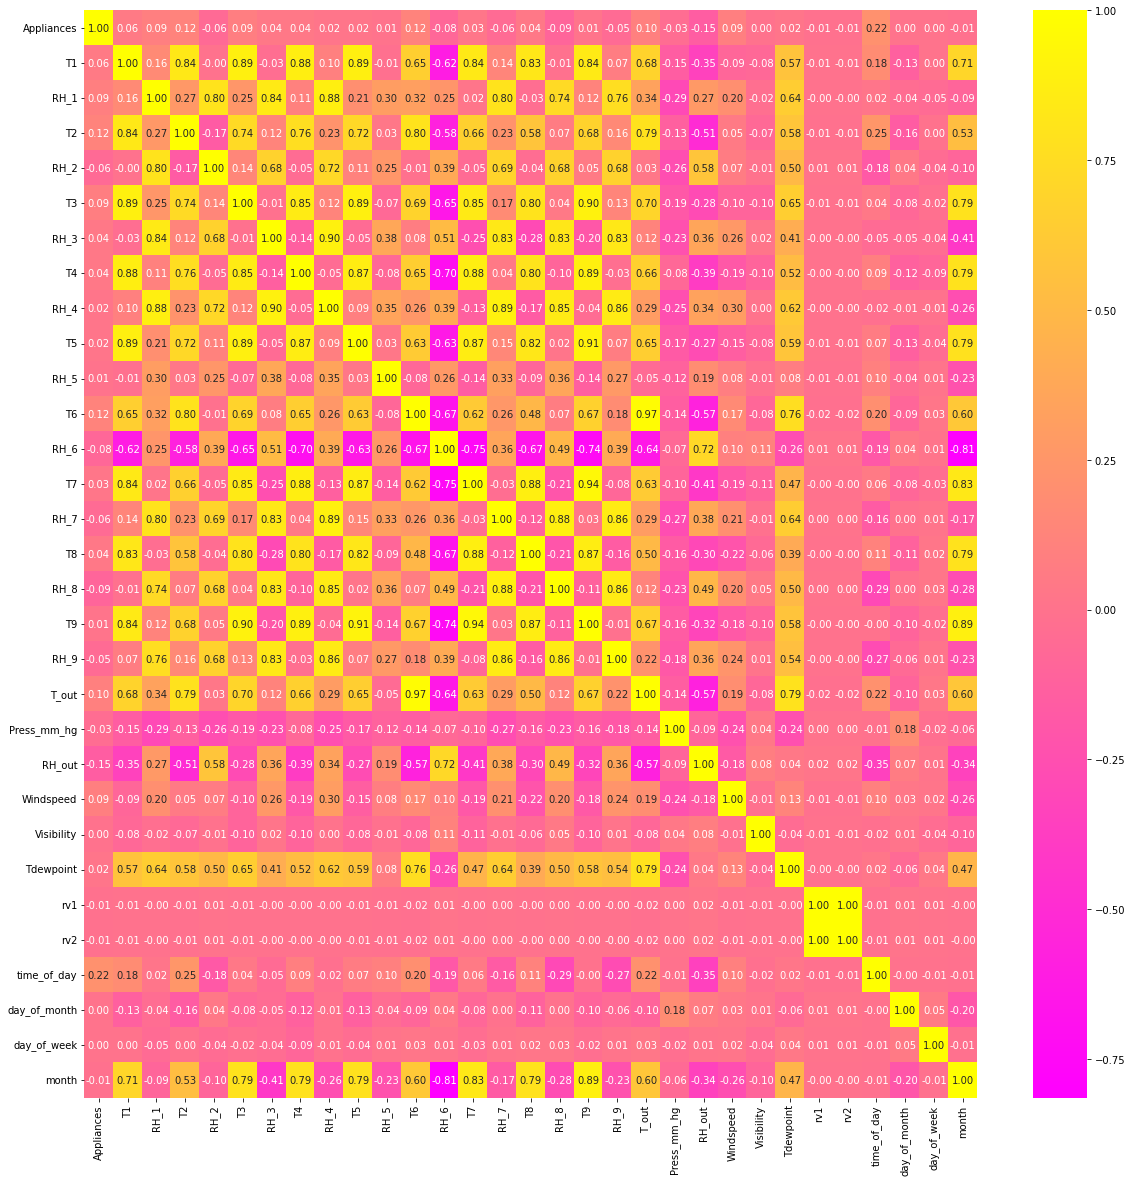

In [425]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='spring', fmt='.2f')

1. T9 ang T6 are highly correlated as 0.94 
2. T_out and T6 are as 0.97 correlated as 0.97
3. We see strong correlation among
temperature variables as change
in outside heat can be
experienced by all rooms except
when changed only by human
intervention such as use of
thermostat, heaters etc.
4. There is also a strong inverse
correlation observed between
RH_6 and all temperature features.
This is because RH_6 is the
outside humidity.
5. As air temperature increases, air
can hold more water molecules,
and its relative humidity
decreases

Text(0.5, 1.0, 'T9 vs T5 relation')

<Figure size 720x720 with 0 Axes>

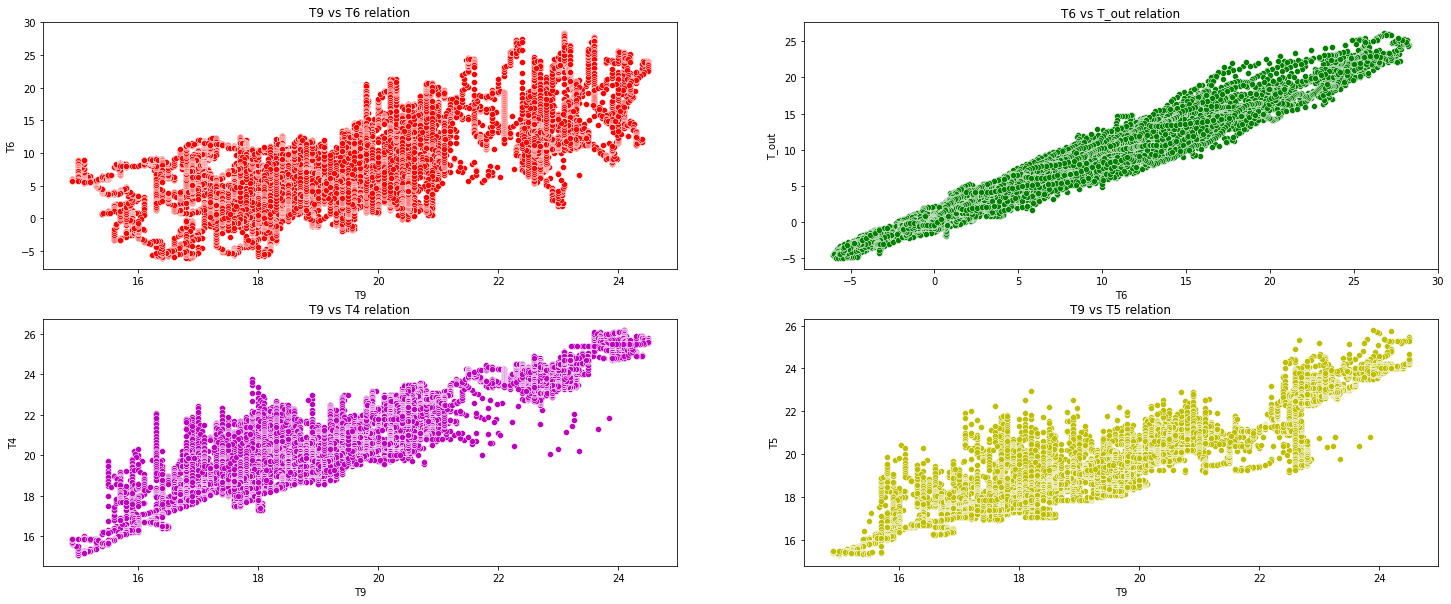

In [426]:
t_col=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']
temp=df[t_col]
plt.figure(figsize=(10,10))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))
ax = axes.flatten()
sns.scatterplot(data=temp, x='T9', y='T6', color='r', ax=ax[0])
sns.scatterplot(data=temp, x='T6', y='T_out',color='g', ax=ax[1])
sns.scatterplot(data=temp, x='T9', y='T4', color='m', ax=ax[2])
sns.scatterplot(data=temp, x='T9', y='T5',color='y', ax=ax[3])
ax[0].set_title('T9 vs T6 relation')
ax[1].set_title('T6 vs T_out relation')
ax[2].set_title('T9 vs T4 relation')
ax[3].set_title('T9 vs T5 relation')

T9, T5,T4, T_out, T6 are highly correlated which causes multicolinearity

since 'rv1' and 'rv2' have correlation of 1, we can drop either of them.

In [427]:
(df['rv1'] ==df['rv2']).unique()

array([ True])

Since both the features are identical, one of them is eliminated from the dataset

In [428]:
df.drop('rv2', axis = 1, inplace = True)
numerical_features.remove('rv2')

In [429]:
numerical_features

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'time_of_day',
 'day_of_month']

now lets check, daywise hourly distribution of data over all variables

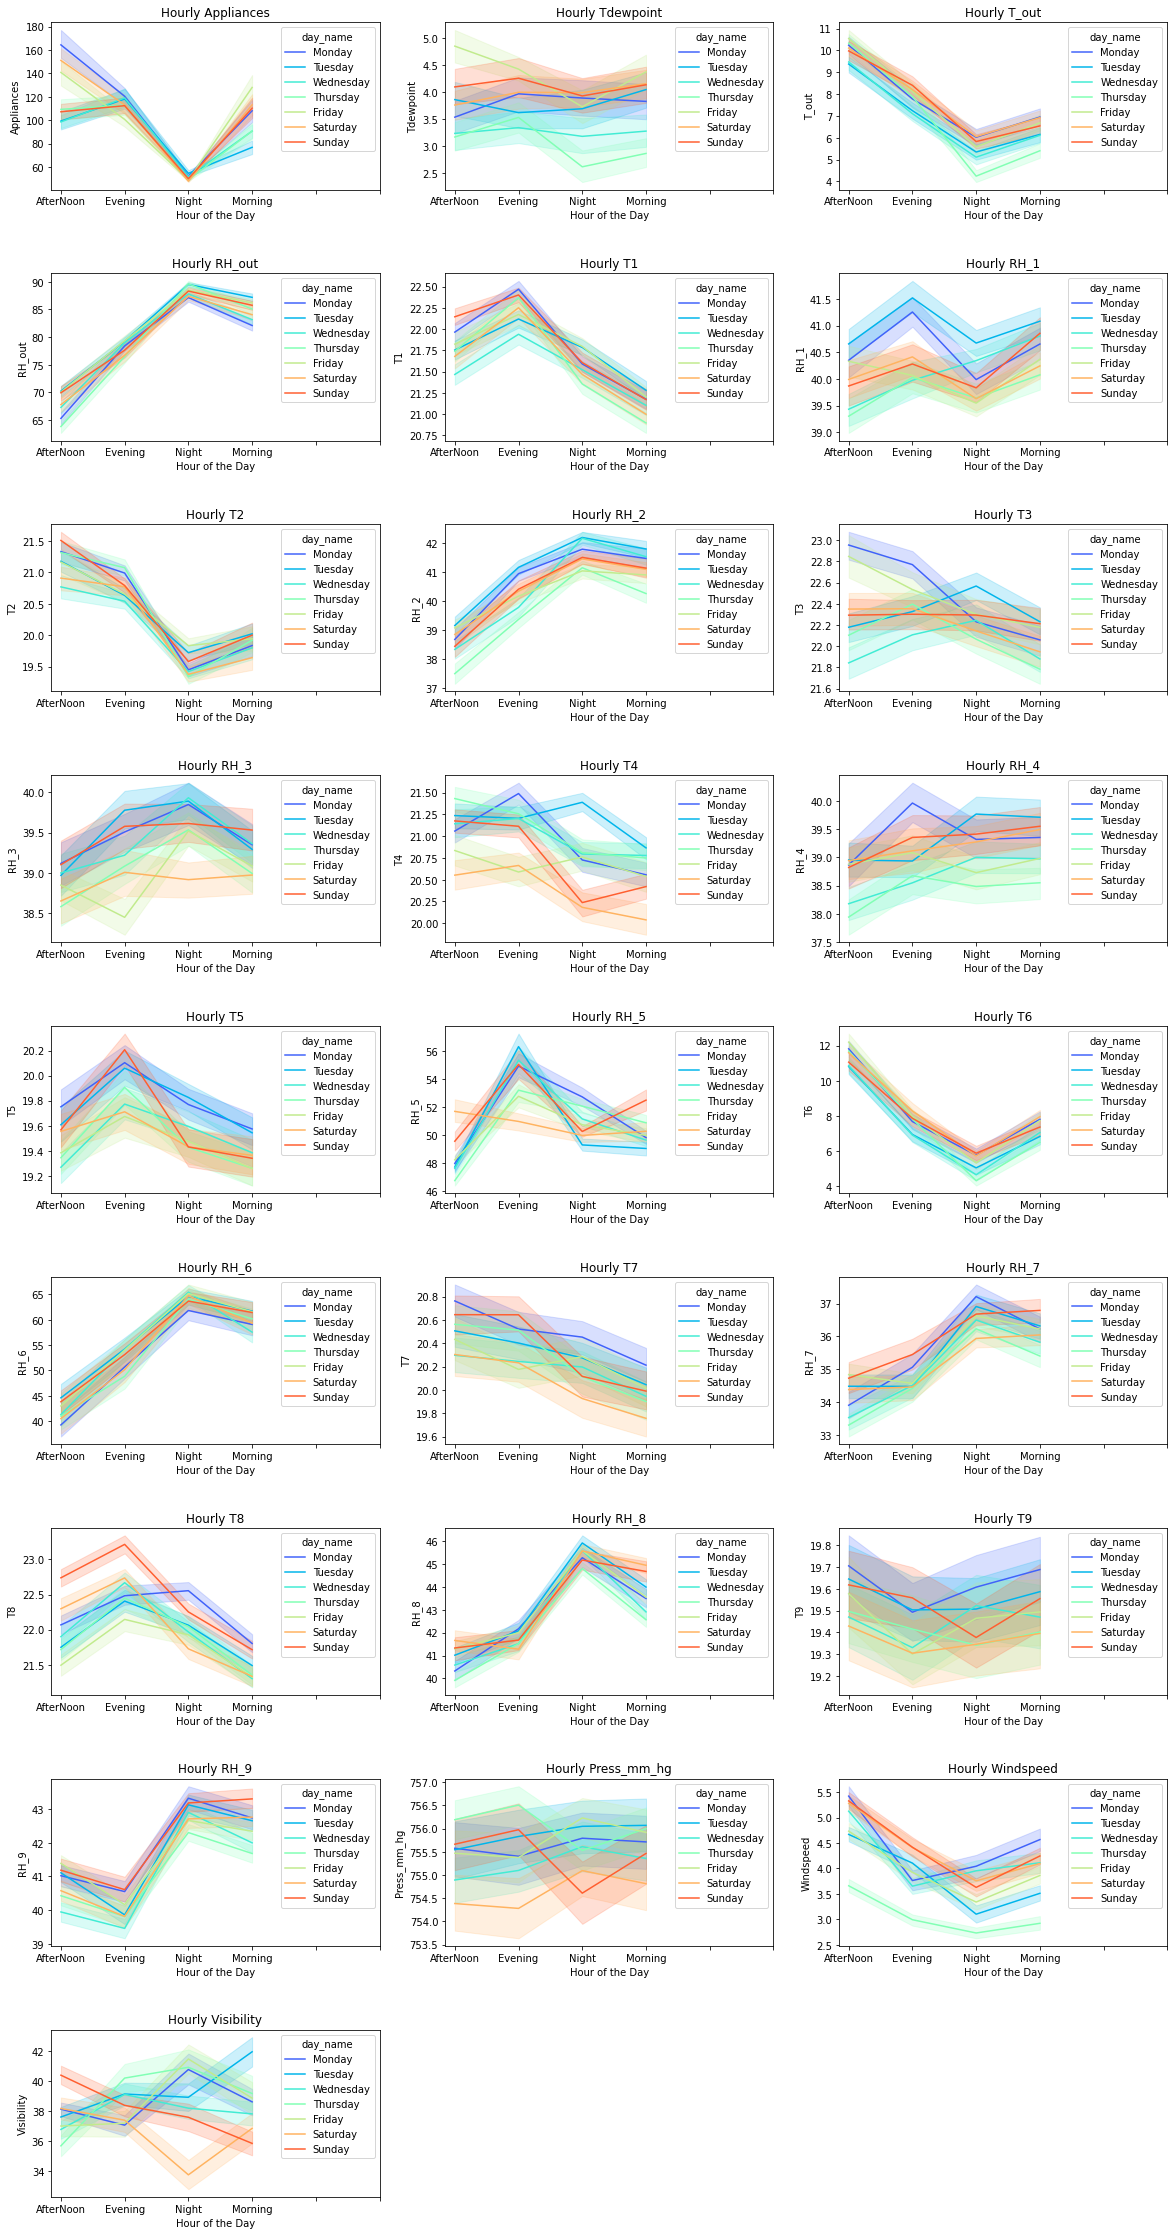

In [430]:
measurements = ['Appliances','Tdewpoint','T_out','RH_out','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','Press_mm_hg','Windspeed','Visibility',]
plt.figure(figsize=(20, 40))
for n, measurement in enumerate(measurements):
    # add a new subplot iteratively
    ax = plt.subplot(9, 3, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    sns.lineplot(x= df['Phase_of_Day'], y = df[measurement], hue = df['day_name'] ,palette = 'rainbow', ax = ax)
    plt.xticks(np.arange(0,6,1))
    plt.title(f"Hourly {measurement}")
    plt.xlabel("Hour of the Day")
    plt.ylabel(measurement)
plt.show()


1. Temparature of Kitchen, bathroom, living area, outside the building (north side) and parents room is less in night also Energy consumption of appliances is less during night.
2. Relative Humidity is more at night.

#Feature Engineering and Selection



## Numerical Outliers

Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like

<Figure size 1800x1800 with 0 Axes>

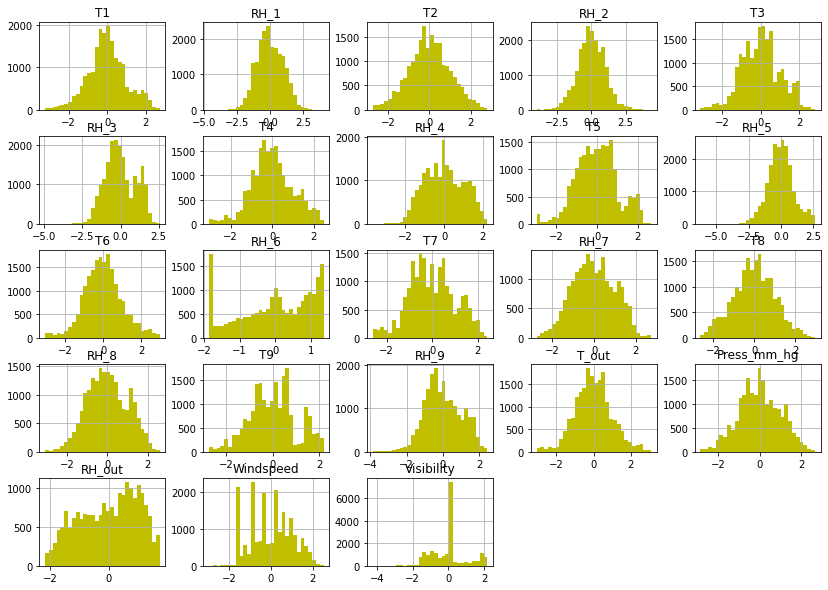

In [431]:
from sklearn.preprocessing import PowerTransformer
plt.figure(figsize=(25,25))
# Init
pt = PowerTransformer()

df[numerical_features[:-4]] = pd.DataFrame(pt.fit_transform(df[numerical_features[:-4]]), columns= numerical_features[:-4])

df[numerical_features[:-4]].hist(figsize=(14, 10), bins = 30, color='y');

### Handling Outliers

As discussed in boxplot, many variables are having outliers hence we need to deal with outliers

#### Inter Quantile method

In [432]:

for ftr in numerical_features+['Appliances']  : 
  print(ftr,'\n')
  q25, q75 = np.percentile(df[ftr], 25), np.percentile(df[ftr], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:
    
    def label(row):
      if row[ftr] > upper: 
        return 1
      if row[ftr] < lower:
        return 1
      else:
        return 0

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]
    
    df[ftr + '_Outlier'] =  df.apply (lambda row: label(row), axis=1)
    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")
  
 

T1 

Percentiles: 25th=-0.565, 75th=0.581, IQR=1.146

lower = -2.2836676230329873 and upper = 2.299703020355362 
 
Identified outliers: 458
T1 Outliers Removed

-------

RH_1 

Percentiles: 25th=-0.710, 75th=0.757, IQR=1.467

lower = -2.9102943560677157 and upper = 2.9580504104125733 
 
Identified outliers: 57
RH_1 Outliers Removed

-------

T2 

Percentiles: 25th=-0.681, 75th=0.669, IQR=1.350

lower = -2.7062907073386384 and upper = 2.693560404797877 
 
Identified outliers: 29
T2 Outliers Removed

-------

RH_2 

Percentiles: 25th=-0.649, 75th=0.684, IQR=1.333

lower = -2.64863648738653 and upper = 2.684322726566248 
 
Identified outliers: 253
RH_2 Outliers Removed

-------

T3 

Percentiles: 25th=-0.711, 75th=0.577, IQR=1.289

lower = -2.6443178882451766 and upper = 2.5099282440396884 
 
Identified outliers: 187
T3 Outliers Removed

-------

RH_3 

Percentiles: 25th=-0.685, 75th=0.837, IQR=1.522

lower = -2.968698096089757 and upper = 3.1200746920725844 
 
Identified outliers: 32
RH_

Lets check effect of removing outliers on daily and weekly Energy consumption 

Text(0.5, 1.0, 'Hourly Day Consumption after removing outliers')

<Figure size 720x360 with 0 Axes>

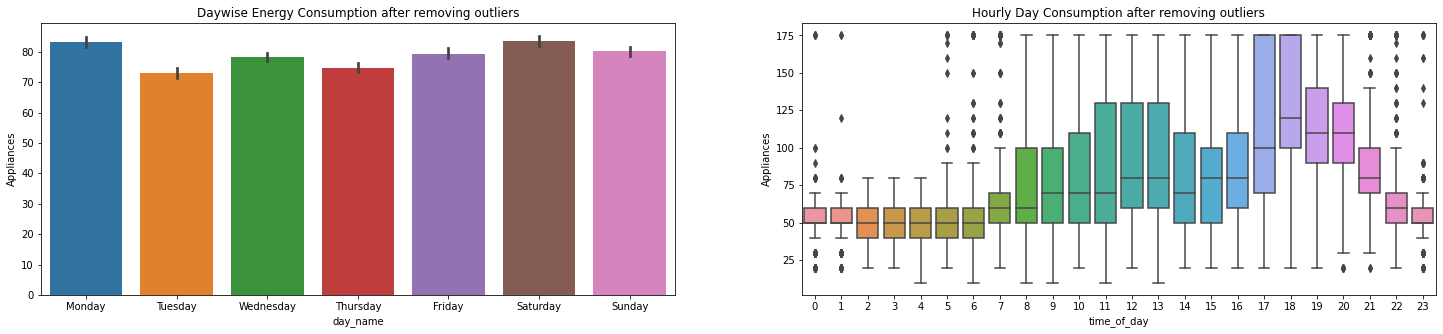

In [433]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
ax = axes.flatten()
sns.barplot(data=df, x='day_name', y='Appliances', ax=ax[0])
sns.boxplot(data=df, x='time_of_day', y='Appliances', ax=ax[1])
ax[0].set_title('Daywise Energy Consumption after removing outliers')
ax[1].set_title('Hourly Day Consumption after removing outliers')

We can see that maximum daily Appliance Energy Consumption is around 175 Wh

# **Encoding Categorical Values**

In [434]:
for ftr in categorical_feature:

  one_hot = pd.get_dummies(df[ftr],prefix = ftr, prefix_sep='_')
  df.drop(ftr, inplace = True, axis=1)
  df = df.join(one_hot)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Appliances              19735 non-null  float64
 1   T1                      19735 non-null  float64
 2   RH_1                    19735 non-null  float64
 3   T2                      19735 non-null  float64
 4   RH_2                    19735 non-null  float64
 5   T3                      19735 non-null  float64
 6   RH_3                    19735 non-null  float64
 7   T4                      19735 non-null  float64
 8   RH_4                    19735 non-null  float64
 9   T5                      19735 non-null  float64
 10  RH_5                    19735 non-null  float64
 11  T6                      19735 non-null  float64
 12  RH_6                    19735 non-null  float64
 13  T7                      19735 non-null  float64
 14  RH_7                    19735 non-null

In [435]:
df.shape

(19735, 66)

In [436]:
df.describe()

Appliances            T1          RH_1            T2          RH_2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      78.887256      0.005158      0.001548     -0.000011     -0.000098   
std       42.961298      0.981467      0.993275      0.999890      0.984568   
min       10.000000     -2.283668     -2.910294     -2.706291     -2.648636   
25%       50.000000     -0.564904     -0.709665     -0.681347     -0.648777   
50%       60.000000     -0.035920     -0.071628     -0.012123     -0.018626   
75%      100.000000      0.580939      0.757421      0.668616      0.684463   
max      175.000000      2.299703      2.958050      2.693560      2.684323   

                 T3          RH_3            T4          RH_4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       0.001266      0.001183      0.003414      0.000059      0.002020   
std        0.994727      0.995791      0.990724      0.999827      0.994382   
min       -2.644318     -2.968698     -2.522621     -3.152024     -2.663552   
25%       -0.711476     -0.685408     -0.632792     -0.786492     -0.682661   
50%       -0.002872     -0.116141     -0.064543     -0.033580     -0.012662   
75%        0.577086      0.836785      0.627093      0.790530      0.637933   
max        2.509928      2.567892      2.473632      2.243383      2.618823   

       ...  day_name_Saturday  day_name_Sunday  day_name_Thursday  \
count  ...       19735.000000     19735.000000       19735.000000   
mean   ...           0.138637         0.138637           0.145934   
std    ...           0.345576         0.345576           0.353049   
min    ...           0.000000         0.000000           0.000000   
25%    ...           0.000000         0.000000           0.000000   
50%    ...           0.000000         0.000000           0.000000   
75%    ...           0.000000         0.000000           0.000000   
max    ...           1.000000         1.000000           1.000000   

       day_name_Tuesday  day_name_Wednesday  month_name_April  \
count      19735.000000        19735.000000      19735.000000   
mean           0.145934            0.145934          0.218900   
std            0.353049            0.353049          0.413511   
min            0.000000            0.000000          0.000000   
25%            0.000000            0.000000          0.000000   
50%            0.000000            0.000000          0.000000   
75%            0.000000            0.000000          0.000000   
max            1.000000            1.000000          1.000000   

       month_name_February  month_name_January  month_name_March  \
count         19735.000000        19735.000000      19735.000000   
mean              0.211604            0.148062          0.226197   
std               0.408456            0.355170          0.418379   
min               0.000000            0.000000          0.000000   
25%               0.000000            0.000000          0.000000   
50%               0.000000            0.000000          0.000000   
75%               0.000000            0.000000          0.000000   
max               1.000000            1.000000          1.000000   

       month_name_May  
count    19735.000000  
mean         0.195237  
std          0.396393  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 66 columns]

## **Developing Machine Learning Model**

###Train Test Split

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [438]:
X = df.drop(columns=['Appliances'])
y=df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,  random_state=5)

In [439]:
X_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'time_of_day', 'day_of_month', 'day_of_week', 'month', 'T1_Outlier',
       'RH_1_Outlier', 'T2_Outlier', 'RH_2_Outlier', 'T3_Outlier',
       'RH_3_Outlier', 'T4_Outlier', 'RH_4_Outlier', 'T5_Outlier',
       'RH_5_Outlier', 'T6_Outlier', 'T8_Outlier', 'RH_8_Outlier',
       'T9_Outlier', 'RH_9_Outlier', 'T_out_Outlier', 'Press_mm_hg_Outlier',
       'Visibility_Outlier', 'Tdewpoint_Outlier', 'Appliances_Outlier',
       'Phase_of_Day_AfterNoon', 'Phase_of_Day_Evening',
       'Phase_of_Day_Morning', 'Phase_of_Day_Night', 'day_name_Friday',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday',
       'month_name_April', 'month_name_February', 'month_name_January',
       'm

# **Scaling Dataset**

Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format. According to the above syntax, we initially create an object of the StandardScaler() function. Further, we use fit_transform() along with the assigned object to transform the data and standardize it.

In [440]:
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled


In [441]:
X_train_scaled, X_test_scaled = do_scale(X_train,X_test)

In [442]:
X_train_scaled.shape, X_test_scaled.shape

((15788, 65), (3947, 65))

##**Functions used for Developing ML Model**

In [443]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error  #model evaluation metrics
from sklearn.linear_model import  LinearRegression, Lasso, Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import KFold        #k folds cross validation
from sklearn.model_selection import cross_val_score  #for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  #hyperparameter tuning

In [444]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [445]:
report = {
    'model_type':[],
    'model_name':[],
    'rmse':[],
    'mae':[],
    'R2':[],
    'adjusted R2':[]

}

In [446]:

# function to evaluate and update model and score
def evaluate(modeltype, modelname, Model, X_train, y_train, X_test, y_test):
  from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error

  if modelname in report['model_name']:
    print("Prexisting Model")
    return 0
  X_tr = X_train.copy()
  X_te = X_test.copy()

  print(f"-------\nTraining {str(Model)} ...")
  Model.fit(X_tr, y_train)

  print(f"\nPredicting{str(Model)} scores ...")

  y_pred = Model.predict(X_te)

  mae = mean_absolute_error(y_test,y_pred)
  report['mae'].append(mae)


  R2 = r2_score(y_test,y_pred)
  report['R2'].append(R2)

  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  report['rmse'].append(rmse)

  adj_r2=1-(1-r2_score(y_test**2,y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  report['adjusted R2'].append(adj_r2)


  report['model_name'].append(modelname)
  report['model_type'].append(modeltype)

  plt.figure(figsize=(20,10))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title(modelname)
  plt.show()



  print(f"\nReport Updated\n----------\n")




In [447]:
#displays report in a dataframe
def display_report():
  return pd.DataFrame(report)

In [448]:
def get_models():
  models, names, model_type = list(), list(), list()

  # LinearReg
  models.append(LinearRegression())
  names.append('Linear Regression')
  model_type.append('Linear')

  #Lasso
  models.append(Lasso(alpha =0.2))
  names.append('Lasso Regression')
  model_type.append('Linear')

  #Ridge
  models.append(Ridge(alpha =0.5))
  names.append('Ridge Regression')
  model_type.append('Linear')


  # DecisionTree
  models.append((DecisionTreeRegressor()))
  names.append('DecisionTree Regressor')
  model_type.append('Tree')

  #RandomForest
  models.append(RandomForestRegressor())
  names.append('RandomForest Regressor')
  model_type.append('Ensemble Method')


  # AdaBoosting
  models.append(AdaBoostRegressor())
  names.append('Adaptive Boosting Regressor')
  model_type.append('Ensemble Method')

  # GradientBoosting
  models.append(GradientBoostingRegressor())
  names.append('GradientBoosting Regressor')
  model_type.append('Ensemble Method')

  #Bagging
  models.append(BaggingRegressor())
  names.append('Bagging Regressor')
  model_type.append('Ensemble Method')


  # KNN
  models.append(KNeighborsRegressor())
  names.append('K Neighbors Regressor')
  model_type.append('Neighbours')

  #Linear SVM
  models.append(LinearSVR())
  names.append('Linear SVR')
  model_type.append('SVM')
  
  return models, names, model_type

##Random Variable Evaluation

As random variables are not playing any kind of role in Energy Prediction, It  is recommended to remove them.

In [449]:
X_train_scaled.drop('rv1', axis =1, inplace = True)
X_test_scaled.drop('rv1', axis =1, inplace = True)

## Inspecting ML Models

-------
Training LinearRegression() ...

PredictingLinearRegression() scores ...


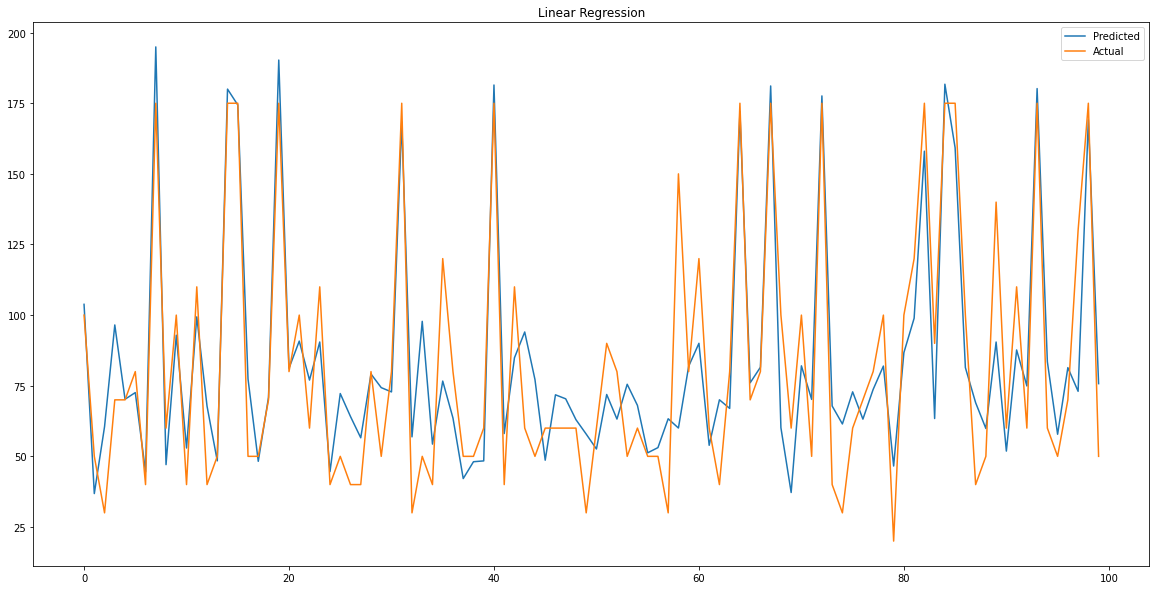


Report Updated
----------

-------
Training Lasso(alpha=0.2) ...

PredictingLasso(alpha=0.2) scores ...


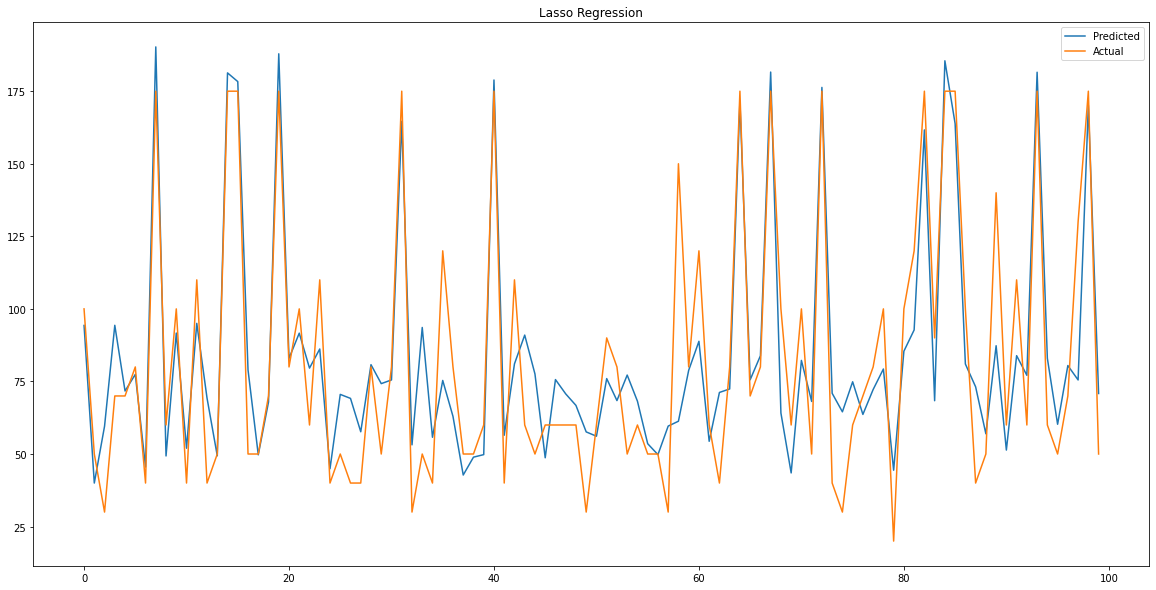


Report Updated
----------

-------
Training Ridge(alpha=0.5) ...

PredictingRidge(alpha=0.5) scores ...


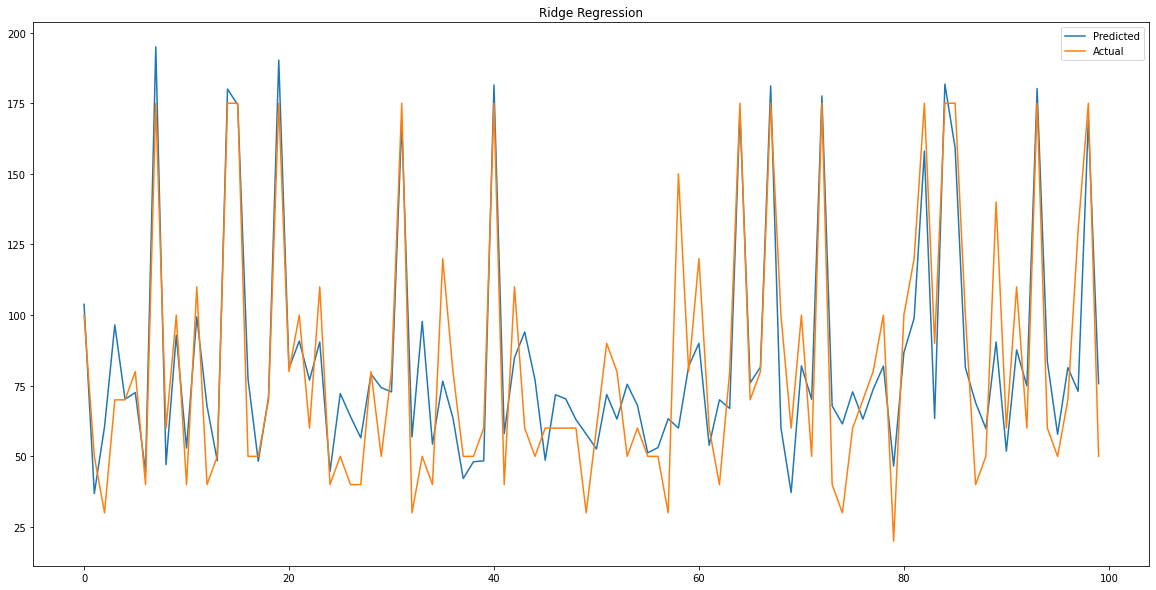


Report Updated
----------

-------
Training DecisionTreeRegressor() ...

PredictingDecisionTreeRegressor() scores ...


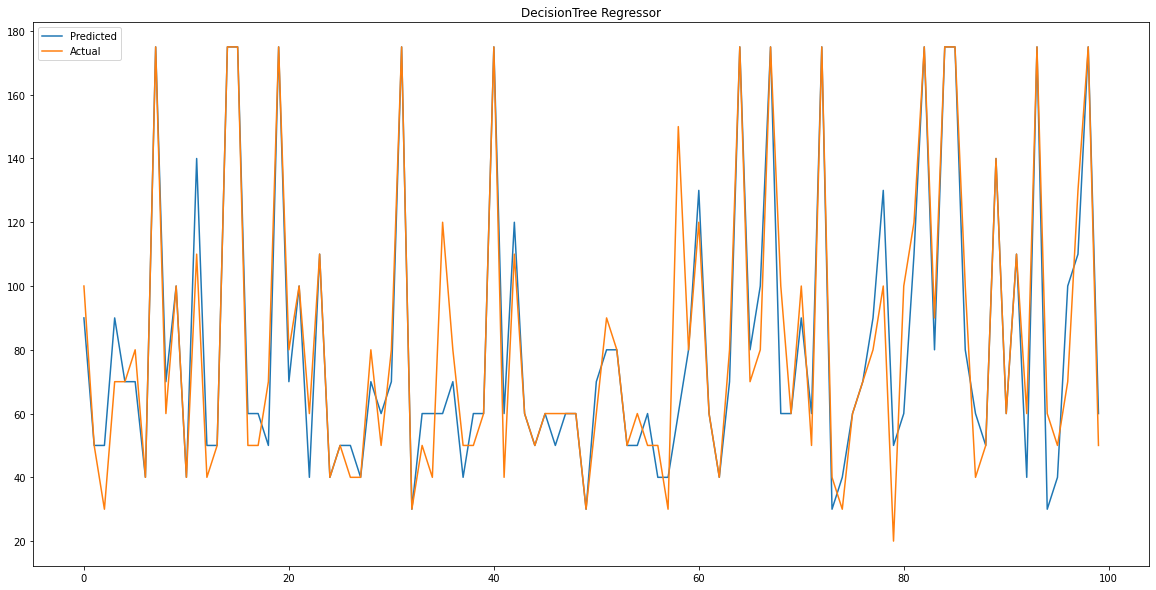


Report Updated
----------

-------
Training RandomForestRegressor() ...

PredictingRandomForestRegressor() scores ...


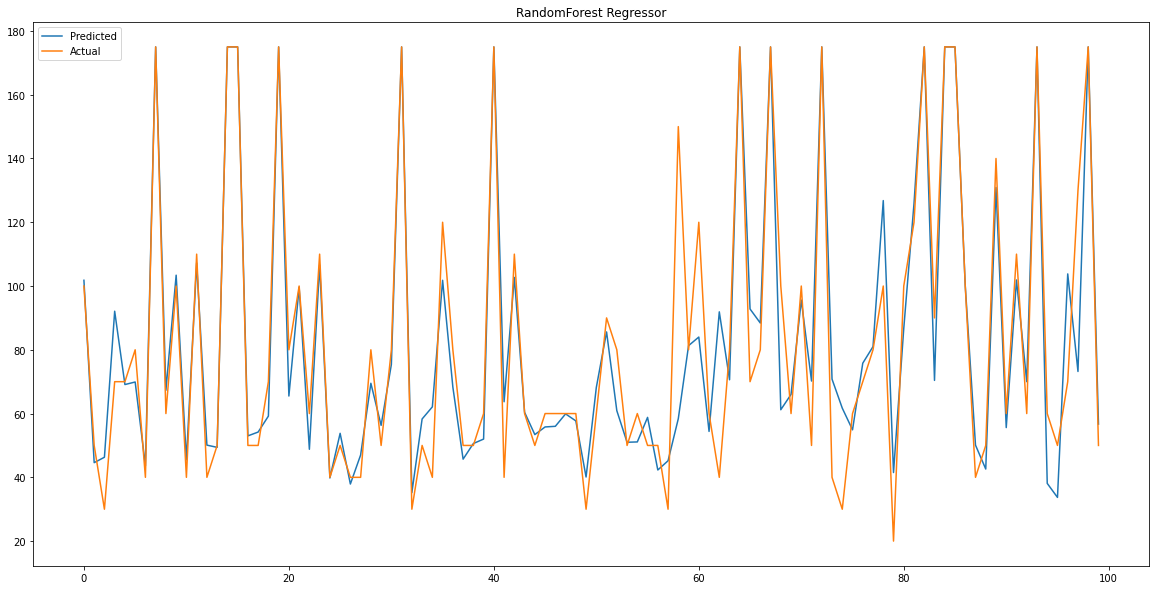


Report Updated
----------

-------
Training AdaBoostRegressor() ...

PredictingAdaBoostRegressor() scores ...


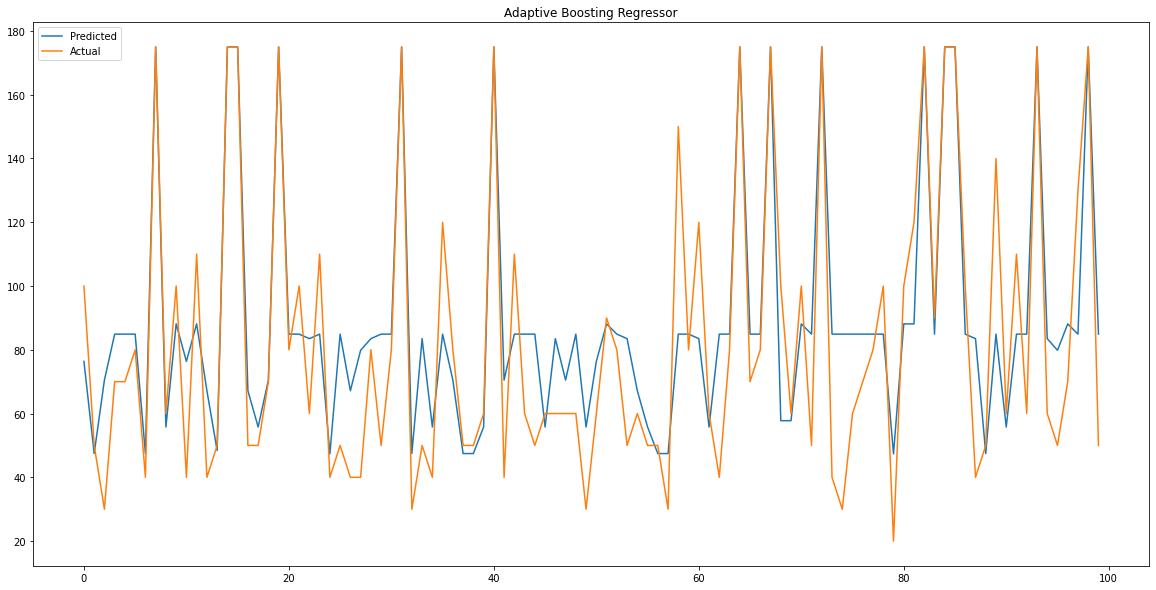


Report Updated
----------

-------
Training GradientBoostingRegressor() ...

PredictingGradientBoostingRegressor() scores ...


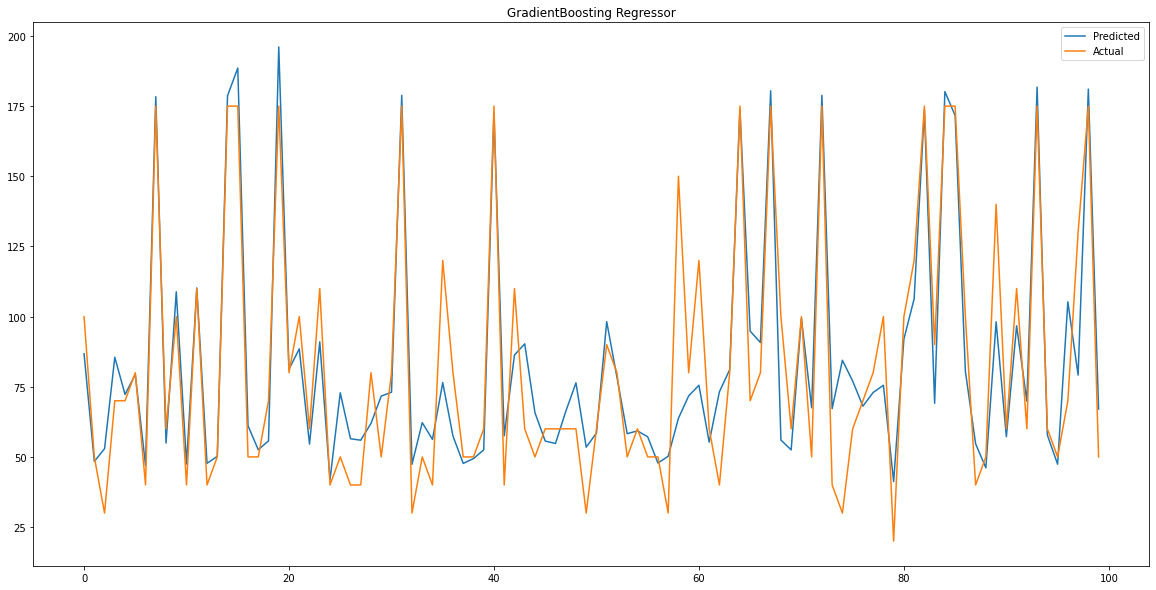


Report Updated
----------

-------
Training BaggingRegressor() ...

PredictingBaggingRegressor() scores ...


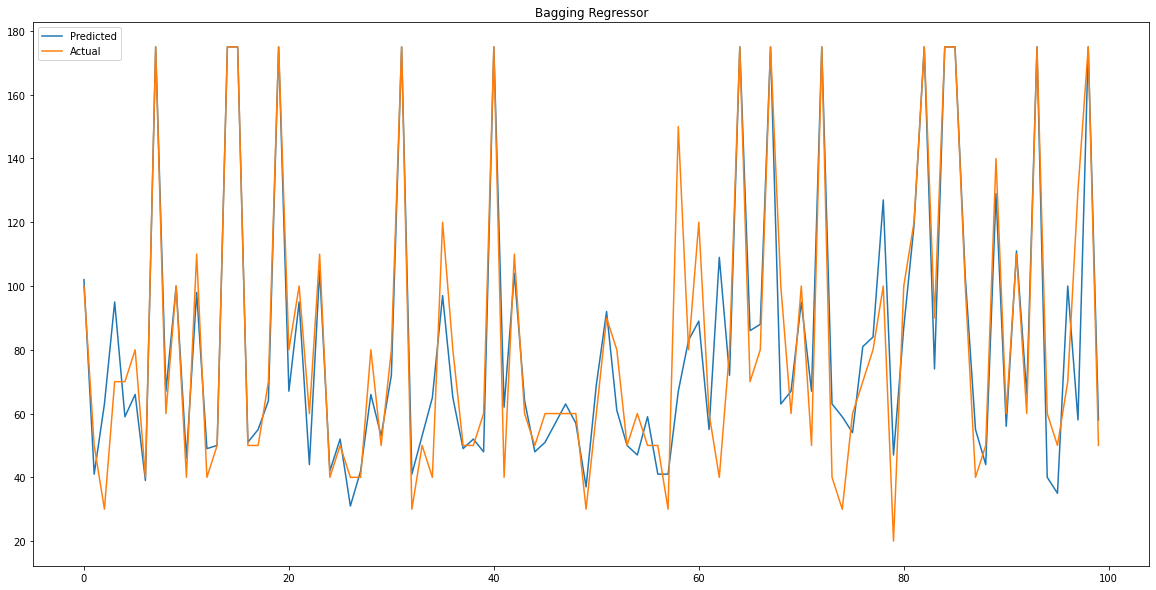


Report Updated
----------

-------
Training KNeighborsRegressor() ...

PredictingKNeighborsRegressor() scores ...


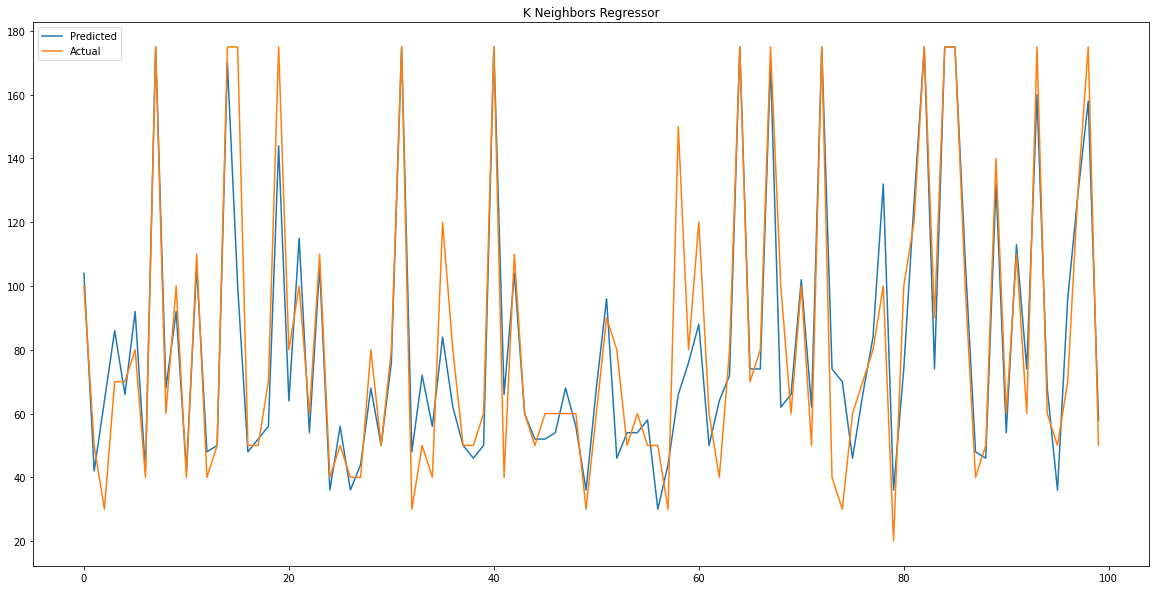


Report Updated
----------

-------
Training LinearSVR() ...

PredictingLinearSVR() scores ...


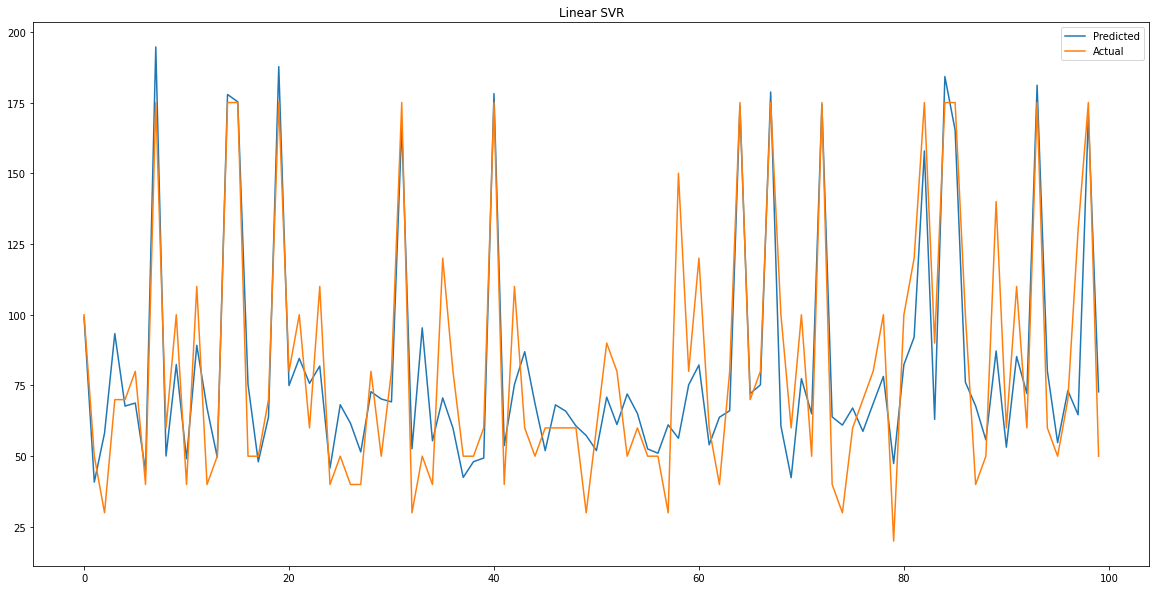


Report Updated
----------



In [450]:
Model, modelname, modeltype = get_models()
for i in range(len(Model)):
  evaluate(modeltype[i], modelname[i], Model[i], X_train_scaled , y_train, X_test_scaled,y_test)

# Hyperparameter Tuning and Cross Validation of Linear Regression- Lasso, Ridge, Elastic Net

# Lasso Regression

In [451]:
# split into training and testing sets and standardize them
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)
lasso.coef_
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
y_pred_lasso = lasso_regressor.predict(X_test)
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -486.22436504743854
MSE : 475.3380810244135
RMSE : 21.80224944872463
R2 : 0.7513403755348605
Adjusted R2 :  0.7480201463667764


# Ridge Regression

In [452]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)
y_pred_ridge = ridge_regressor.predict(X_test)
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -485.9298620348441
MSE : 475.1601384142211
RMSE : 21.798168235294934
R2 : 0.751433461160425
Adjusted R2 :  0.7481144749187297


# Elastic net Regression

In [453]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)
elasticnet.score(X_train, y_train)
y_pred_en = elasticnet.predict(X_test)
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)
y_pred_elastic = elastic_regressor.predict(X_test)
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 604.1812549466498
RMSE : 24.580098757870154
R2 : 0.6839397263519593
Adjusted R2 :  nan
The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -486.14623010646426
MSE : 475.19468176076873
RMSE : 21.798960566062977
R2 : 0.7514153907892025
Adjusted R2 :  -inf


# Results 

In [454]:
display_report()

model_type                   model_name       rmse        mae  \
0           Linear            Linear Regression  21.733170  16.306936   
1           Linear             Lasso Regression  21.961607  16.353007   
2           Linear             Ridge Regression  21.733188  16.306813   
3             Tree       DecisionTree Regressor  18.638752  10.980492   
4  Ensemble Method       RandomForest Regressor  14.398756   9.129161   
5  Ensemble Method  Adaptive Boosting Regressor  23.643110  17.428959   
6  Ensemble Method   GradientBoosting Regressor  18.568008  13.030675   
7  Ensemble Method            Bagging Regressor  14.920081   9.546744   
8       Neighbours        K Neighbors Regressor  18.946058  12.056245   
9              SVM                   Linear SVR  22.285024  15.921913   

         R2  adjusted R2  
0  0.750736     0.804781  
1  0.745469     0.806092  
2  0.750736     0.804788  
3  0.816665     0.854426  
4  0.890589     0.914612  
5  0.705000     0.813023  
6  0.818054     0.865411  
7  0.882522     0.910790  
8  0.810569     0.806065  
9  0.737917     0.791844

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

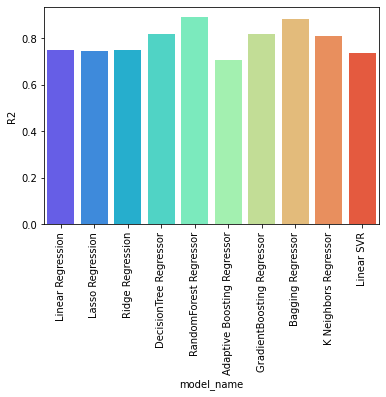

In [455]:
final_report = display_report()
sns.barplot(x = final_report['model_name'], y = final_report['R2'], palette = 'rainbow')
plt.xticks(rotation = 90)

Spot-checking is a way
of discovering which algorithms
perform well on the machine
learning problem

RandomForest Regressor has the lowest mae, rmse and highest R2 score.



#HyperParameter Tuning of best Fitted Model based on R2 Score

From the observations, it is found
that the Random Forest Regressor
performed the best with the least
RMSE and MAE of 14.46 and
9.14	 and the highest R-squared
score of 0.889576
In order to improve the performance
of Random Forest Regressor,
RandomSearchCV is used to
optimize its parameters

In [456]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [457]:
X_train_scaled, X_test_scaled = do_scale(X_train,X_test)

In [458]:
seed=5
param_grid = param_grid = { 'bootstrap': [True], 
                          'max_depth': [5,8],
                          'criterion' :['squared_error'],
                          'max_features': [ 'log2', 'sqrt'], 
                          'n_estimators': [300,400]}
random_forest = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits= 5)
search = RandomizedSearchCV(estimator= random_forest, param_distributions = param_grid, scoring='r2', n_jobs = -1, verbose = 5)
search_result = search.fit(X_train_scaled, y_train)
search_result

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(estimator=RandomForestRegressor(random_state=5), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['squared_error'],
                                        'max_depth': [5, 8],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [300, 400]},
                   scoring='r2', verbose=5)

In [459]:
search_result.best_params_ , search_result.best_score_

({'n_estimators': 300,
  'max_features': 'sqrt',
  'max_depth': 8,
  'criterion': 'squared_error',
  'bootstrap': True},
 0.7486851252011139)

-------
Training RandomForestRegressor(max_features='sqrt', n_estimators=300) ...

PredictingRandomForestRegressor(max_features='sqrt', n_estimators=300) scores ...


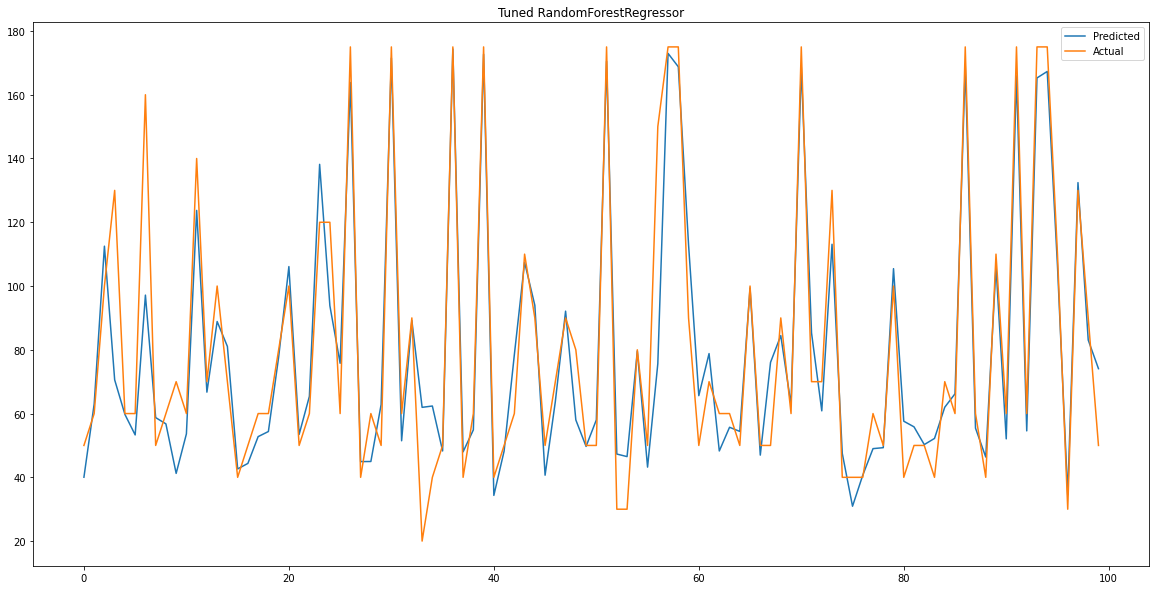


Report Updated
----------



In [460]:
tuned_random_forest = RandomForestRegressor(bootstrap = True, criterion = 'squared_error', max_features = 'sqrt', n_estimators = 300)
evaluate("Ensemble Method", "Tuned RandomForestRegressor", tuned_random_forest , X_train_scaled , y_train, X_test_scaled,y_test)

In [461]:
display_report()

model_type                   model_name       rmse        mae  \
0            Linear            Linear Regression  21.733170  16.306936   
1            Linear             Lasso Regression  21.961607  16.353007   
2            Linear             Ridge Regression  21.733188  16.306813   
3              Tree       DecisionTree Regressor  18.638752  10.980492   
4   Ensemble Method       RandomForest Regressor  14.398756   9.129161   
5   Ensemble Method  Adaptive Boosting Regressor  23.643110  17.428959   
6   Ensemble Method   GradientBoosting Regressor  18.568008  13.030675   
7   Ensemble Method            Bagging Regressor  14.920081   9.546744   
8        Neighbours        K Neighbors Regressor  18.946058  12.056245   
9               SVM                   Linear SVR  22.285024  15.921913   
10  Ensemble Method  Tuned RandomForestRegressor  14.398574   9.845267   

          R2  adjusted R2  
0   0.750736     0.804781  
1   0.745469     0.806092  
2   0.750736     0.804788  
3   0.816665     0.854426  
4   0.890589     0.914612  
5   0.705000     0.813023  
6   0.818054     0.865411  
7   0.882522     0.910790  
8   0.810569     0.806065  
9   0.737917     0.791844  
10  0.891547     0.908851

Upon tuning, the r2 score has been improved from 0.890333 to 0.895157

#Model Explainability

Model explainability refers to the concept of being able to understand the machine learning model
Importance: Feature
Importance refers to techniques that
assign a score to input features based
on how useful they are at predicting
a target variable.
Feature importance scores provide
insight into the data and the deployed
model.

By looking at the Feature Importance
graphs and the contribution chart
from ELI5, we can gather that the
appliance energy consumption
largely depends on the time of the
day and temperatures in rooms 4,2 and
8.

##Feature Importance

In [462]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,15))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='m', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

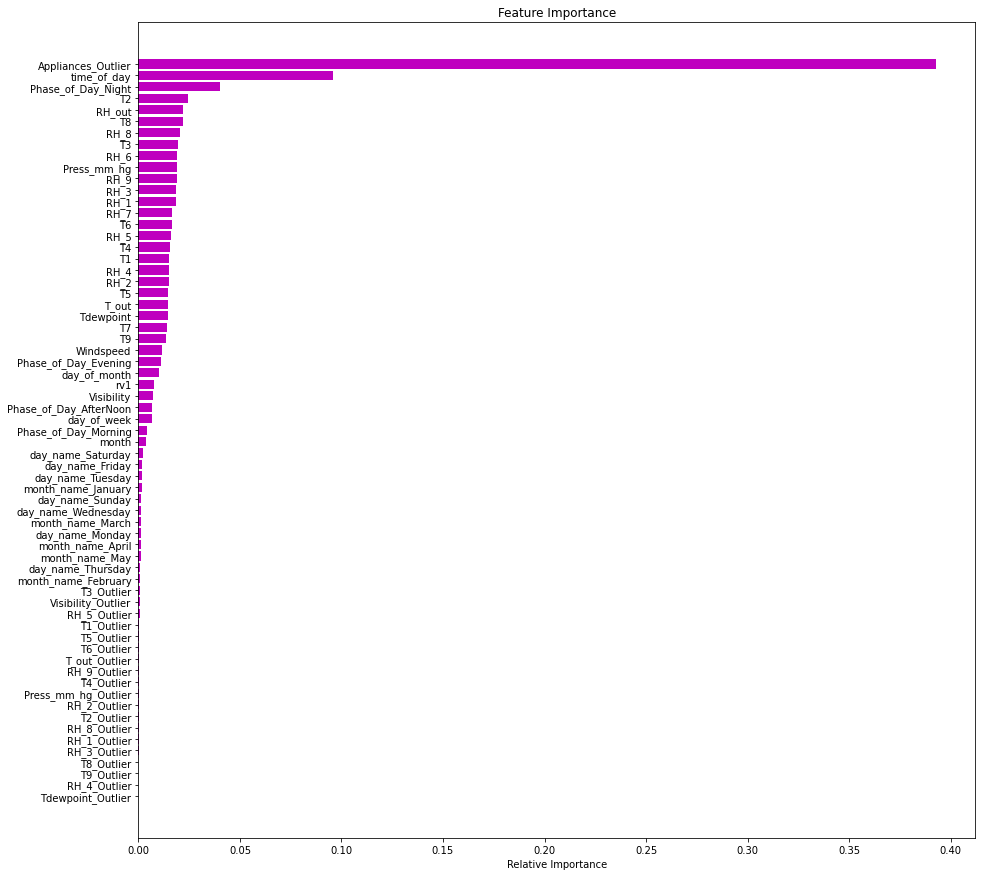

In [463]:
# Getting features importance of decision tree
get_features_importance(tuned_random_forest,X_train_scaled )

##Eli5

In [464]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [465]:
import eli5 as eli

In [466]:
for_instance=2

In [467]:
eli.explain_weights(tuned_random_forest)

Explanation(estimator="RandomForestRegressor(max_features='sqrt', n_estimators=300)", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x48', weight=0.3926283868677972, std=0.1269559477004979, value=None), FeatureWeight(feature='x25', weight=0.09594479576013286, std=0.06948268114279732, value=None), FeatureWeight(feature='x52', weight=0.0401751908456089, std=0.04937600812846167, value=None), FeatureWeight(feature='x2', weight=0.024530408105787292, std=0.016512192916233768, value=None), FeatureWeight(feature='x20', weight=0.021983845111809498, std=0.017083548014278506, value=None), FeatureWeight(feature='x14', weight=0.021862674624672583, std=0.008612562655411727, value=None), FeatureWeight(feature='x15', weight=0.02042592649969618, std=0.01112762116119637, value=None), FeatureWeight(feature='x4', weight=0.0194021790144243, std=0.009198214789113954, value=None), FeatureWeight(feature='x11', weight=0.01905044112354245, std=0.01170944244372713, value=None), FeatureWeight(feature='x19', weight=0.018942782150297533, std=0.006351611534766296, value=None), FeatureWeight(feature='x17', weight=0.018867578845481056, std=0.008019025948289637, value=None), FeatureWeight(feature='x5', weight=0.018610553913996176, std=0.007672030203682565, value=None), FeatureWeight(feature='x1', weight=0.018336885201098743, std=0.007433900593418504, value=None), FeatureWeight(feature='x13', weight=0.016538203055818775, std=0.007476911403393058, value=None), FeatureWeight(feature='x10', weight=0.01630954477405984, std=0.008221426481902813, value=None), FeatureWeight(feature='x9', weight=0.015857379077675798, std=0.005196681263776242, value=None), FeatureWeight(feature='x6', weight=0.015461232741945835, std=0.00635863630867296, value=None), FeatureWeight(feature='x0', weight=0.0151556779378705, std=0.0069996566292263515, value=None), FeatureWeight(feature='x7', weight=0.015136607229177423, std=0.006252042488866903, value=None), FeatureWeight(feature='x3', weight=0.01490306819998063, std=0.005965221220488705, value=None)], remaining=45), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [468]:
y_test

343       50.0
13136     60.0
19315    100.0
4706     130.0
5322      60.0
         ...  
2623      70.0
1511      20.0
12295     50.0
5543      40.0
16274    175.0
Name: Appliances, Length: 4934, dtype: float64

In [469]:
eli.show_prediction(tuned_random_forest, X_test_scaled.iloc[1],
                    feature_names=list(X_test_scaled.columns),
                    show_feature_values=True)

## LIME

In this section, we’ll be
assessing predictions of the tuned model
using LIME.

In [470]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [471]:
categorical_names = list(X_train_scaled.columns[28:])

In [472]:
len(X_train_scaled.columns)

65

In [473]:
categorical_features = np.arange(28,66,1)

In [474]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled.values,
                                                   feature_names= list(X_train_scaled.columns),
                                                   categorical_names = categorical_names,
                                                   categorical_features =categorical_features,
                                                   mode = 'regression'
                                                   )  

In [475]:
exp = explainer.explain_instance(X_test_scaled.iloc[12],tuned_random_forest.predict,num_features=10,top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)
print("Actual Value", y_test.iloc[12])

Actual Value 70.0


In [ ]:
exp = explainer.explain_instance(X_test_scaled.iloc[105],tuned_random_forest.predict,num_features=10,top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)
print("Actual Value", y_test.iloc[105])

In [ ]:
exp = explainer.explain_instance(X_test_scaled.iloc[181],tuned_random_forest.predict,num_features=10,top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)
print("Actual Value", y_test.iloc[181])

#Conclusion



*   The household appliance energy
consumption prediction models based on
Linear Regression, Lasso Regression, Ridge
Regression, DecisionTree Regressor
Random Forest Regressor, Adaptive
Boosting Regressor, Gradient Boosting
Regressor, Bagging Regressor, K Neighbors
Regressor and Linear SVM are explored.

* Upon appropriate preprocessing and fitting
the ten models, we compare and evaluate the
best model with lowest error and the highest
R-squared score.

* When evaluating the influence of Random
Variable attribute the linear models have
assigned near zero weights to the random
variable, negating its influence in prediction
of the target variable.

* Random Forest Regressor was found to be
the best performing model with an
R-squared score of 0.767.

* After optimizing the hyperparameters of the
Random Forest Regressor, its R-squared
score increased from 0.767 to 0.771.

* We find that this model’s predictions are
mainly contributed by the time of the day
and temperature in rooms 3 and 2.

* As this dataset has a time component to it,
we believe that better performances can be
achieved by using Time Series Analysis
concepts.




In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train_scaled.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X_train_scaled.shape[1])]

    return(vif)

p=calc_vif(df[[i for i in df.describe().columns]])
p.sort_values(by='VIF')